In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Basic packages
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
#import plotly.express as px
%matplotlib inline

# Impute and Encode
from sklearn.preprocessing import LabelEncoder
#from impute.imputation.cs import mice

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score,roc_curve

# Oversampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

In [2]:


# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
 
 
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
# link = 'https://drive.google.com/file/d/1D4z13rFbwe6ch0WwEiCO2dd5a18avot6/view?usp=sharing'
# link2 = 'https://drive.google.com/file/d/1qLbITeJToHCKtzG2HnvSZUn5v3LeW7lg/view?usp=sharing'
 
# import pandas as pd
 
# # to get the id part of the file
# id = link.split("/")[-2]
# id2 = link2.split("/")[-2]
 
# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('Train_Set_TVS.csv') 
df_train = pd.read_csv("Train_Set_TVS.csv")
df_train.head()

ID  Compensation Vehicle_Status  Loan_amt  Annuity_amt  density_Ind  \
0  540071      801850.0              Y  658040.0     13816.52       0.0304   
1  511643      884222.0              N  198075.0     11173.06       0.0194   
2  506688      284120.0              N  101056.0      8390.40       0.0118   
3  499360      341874.0              N  179008.0      7184.13       0.0373   
4  438350     1259895.0              Y  573715.0     13212.77       0.0138   

  Job_Type Default_hist     Prop_List  Home_Appliances Region_Type Credit_Inq  \
0       IT          ndf  Morethan_One              NaN       Metro          1   
1       IT          ndf  Morethan_One              1.0       Metro          2   
2    Govt.          ndf           One              4.0       Metro          3   
3   Non-IT           df          None              2.0       Metro          1   
4   Non-IT          ndf  Morethan_One              1.0       Rural          2   

  Education_det Marital_Stat Gen Credit_Lnks  Experience     Income_Alt  \
0          Grad      Married   F      1_to_3         0.9  Not_Specified   
1          Grad      Married   M      1_to_3         3.0  Not_Specified   
2         Other      Married   M      1_to_3         NaN  Not_Specified   
3          Grad      Married   M      1_to_3         4.7  Not_Specified   
4          Grad      Married   F      4_to_6         6.9              Y   

  Day_Process Ph.No Type_Loan  Dependents  Company_Rating Region   Age  \
0         SAT   Yes     CLoan         3.0             2.0   East  46.0   
1         wed   Yes     CLoan         3.0             1.0  North  46.0   
2         mon   Yes     CLoan         2.0             3.0  North  57.0   
3         wed   Yes     RLoan         4.0             2.0  South  39.0   
4         Sun   Yes     CLoan         3.0             1.0  North  32.0   

   hour_Process Addr_permanent Permanent_Addr_tag  c1_rated  c2_rated  \
0          10.0            Yes                 No     0.077     0.077   
1          12.0            Yes                Yes     0.184     0.184   
2           5.0            Yes                Yes     0.538     0.538   
3          12.0            Yes                Yes       NaN     0.561   
4          16.0            Yes                Yes       NaN     0.200   

   Contact_age  Product_bought  Default  
0         18.0             2.0      1.0  
1        306.0             4.0      0.0  
2        281.0             4.0      0.0  
3         20.0             4.0      0.0  
4       2339.0             6.0      0.0

In [3]:
df_train.shape

(132440, 33)

In [4]:
df_train.describe()

ID  Compensation      Loan_amt    Annuity_amt  \
count  132440.000000  1.261980e+05  1.324400e+05  127829.000000   
mean   488938.279319  7.450519e+05  4.148011e+05   10845.286442   
std     58568.207772  4.702762e+05  2.746788e+05    2061.529355   
min    387652.000000  1.527280e+05  3.427500e+04    5852.100000   
25%    438095.500000  5.177060e+05  2.045300e+05    9348.370000   
50%    488952.500000  6.659960e+05  3.495425e+05   10773.820000   
75%    539702.000000  8.794890e+05  5.582050e+05   12165.390000   
max    590407.000000  7.037702e+07  2.872142e+06   41301.000000   

         density_Ind  Home_Appliances     Experience     Dependents  \
count  127024.000000    121476.000000  110595.000000  132440.000000   
mean        0.020446         3.220891       6.580616       2.155467   
std         0.015077         1.241751       6.357054       0.909046   
min         0.000100         1.000000       0.000000       1.000000   
25%         0.010400         2.000000       2.100000       2.000000   
50%         0.020400         4.000000       4.600000       2.000000   
75%         0.030400         4.000000       9.000000       3.000000   
max         2.017800        19.000000      48.100000       9.000000   

       Company_Rating           Age   hour_Process       c1_rated  \
count   120709.000000  132440.00000  132440.000000  114927.000000   
mean         2.030553      43.93326      12.060865       0.505929   
std          0.503750      11.96270       3.566714       0.268665   
min          1.000000      21.00000       0.000000       0.000000   
25%          2.000000      34.00000      10.000000       0.268000   
50%          2.000000      43.00000      12.000000       0.500000   
75%          2.000000      54.00000      15.000000       0.769000   
max          3.000000      69.00000      25.000000       0.947000   

            c2_rated    Contact_age  Product_bought        Default  
count  119119.000000  124287.000000   132440.000000  132440.000000  
mean        0.506181     979.451383        3.387738       0.264301  
std         0.268716     829.632194        2.173246       0.440962  
min         0.000000      10.000000        0.000000       0.000000  
25%         0.268000     288.000000        2.000000       0.000000  
50%         0.500000     770.000000        3.000000       0.000000  
75%         0.769000    1589.000000        5.000000       1.000000  
max         0.947000    4309.000000       25.000000       1.000000

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
ID                    132440 non-null int64
Compensation          126198 non-null float64
Vehicle_Status        123336 non-null object
Loan_amt              132440 non-null float64
Annuity_amt           127829 non-null float64
density_Ind           127024 non-null float64
Job_Type              122192 non-null object
Default_hist          132440 non-null object
Prop_List             130475 non-null object
Home_Appliances       121476 non-null float64
Region_Type           132440 non-null object
Credit_Inq            129750 non-null object
Education_det         132440 non-null object
Marital_Stat          132440 non-null object
Gen                   132440 non-null object
Credit_Lnks           132440 non-null object
Experience            110595 non-null float64
Income_Alt            124758 non-null object
Day_Process           132440 non-null object
Ph.No                 132440 

In [6]:
df_train.isnull().sum()

ID                        0
Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            21845
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              17513
c2_rated              13321
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64

In [7]:
(df_train.isnull().sum()/len(df_train))*100

ID                     0.000000
Compensation           4.713078
Vehicle_Status         6.874056
Loan_amt               0.000000
Annuity_amt            3.481577
density_Ind            4.089399
Job_Type               7.737844
Default_hist           0.000000
Prop_List              1.483691
Home_Appliances        8.278466
Region_Type            0.000000
Credit_Inq             2.031108
Education_det          0.000000
Marital_Stat           0.000000
Gen                    0.000000
Credit_Lnks            0.000000
Experience            16.494262
Income_Alt             5.800362
Day_Process            0.000000
Ph.No                  0.000000
Type_Loan              0.000000
Dependents             0.000000
Company_Rating         8.857596
Region                 0.000000
Age                    0.000000
hour_Process           0.000000
Addr_permanent         0.000000
Permanent_Addr_tag     0.000000
c1_rated              13.223346
c2_rated              10.058140
Contact_age            6.155995
Product_

### Droping variables 'Experience','c1_rated','c2_rated' having null greater than 10% of the data.

In [8]:
df_train = df_train.drop(['Experience','c1_rated','c2_rated'],axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 30 columns):
ID                    132440 non-null int64
Compensation          126198 non-null float64
Vehicle_Status        123336 non-null object
Loan_amt              132440 non-null float64
Annuity_amt           127829 non-null float64
density_Ind           127024 non-null float64
Job_Type              122192 non-null object
Default_hist          132440 non-null object
Prop_List             130475 non-null object
Home_Appliances       121476 non-null float64
Region_Type           132440 non-null object
Credit_Inq            129750 non-null object
Education_det         132440 non-null object
Marital_Stat          132440 non-null object
Gen                   132440 non-null object
Credit_Lnks           132440 non-null object
Income_Alt            124758 non-null object
Day_Process           132440 non-null object
Ph.No                 132440 non-null object
Type_Loan             132440 n

In [9]:
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        print("Unique values in ",column.upper(),'is : ',df_train[column].nunique())
        print(df_train[column].value_counts().sort_values())
        print('\n')

Unique values in  VEHICLE_STATUS is :  2
Y    41966
N    81370
Name: Vehicle_Status, dtype: int64


Unique values in  JOB_TYPE is :  3
Govt.     25722
Non-IT    29488
IT        66982
Name: Job_Type, dtype: int64


Unique values in  DEFAULT_HIST is :  2
df      13270
ndf    119170
Name: Default_hist, dtype: int64


Unique values in  PROP_LIST is :  3
None            13020
Morethan_One    25896
One             91559
Name: Prop_List, dtype: int64


Unique values in  REGION_TYPE is :  3
other      2614
Rural     22278
Metro    107548
Name: Region_Type, dtype: int64


Unique values in  CREDIT_INQ is :  4
>4     9138
3     23178
2     30362
1     67072
Name: Credit_Inq, dtype: int64


Unique values in  EDUCATION_DET is :  3
Other      6125
P_Grad    32457
Grad      93858
Name: Education_det, dtype: int64


Unique values in  MARITAL_STAT is :  4
Widow       6776
Divorce     8391
Single     19664
Married    97609
Name: Marital_Stat, dtype: int64


Unique values in  GEN is :  2
F    45377
M    

In [10]:
df_train.columns = df_train.columns.str.replace('.', '_')
df_train.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Income_Alt', 'Day_Process',
       'Ph_No', 'Type_Loan', 'Dependents', 'Company_Rating', 'Region', 'Age',
       'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag', 'Contact_age',
       'Product_bought', 'Default'],
      dtype='object')

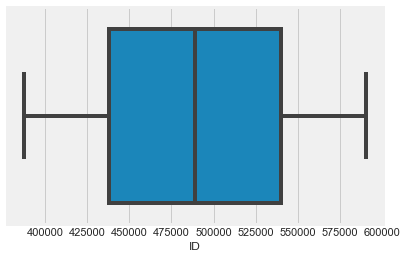

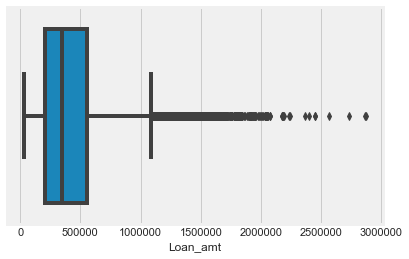

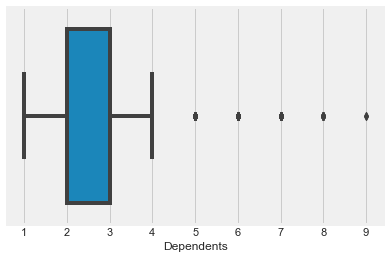

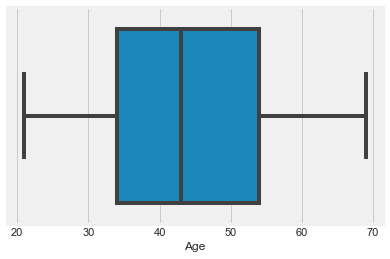

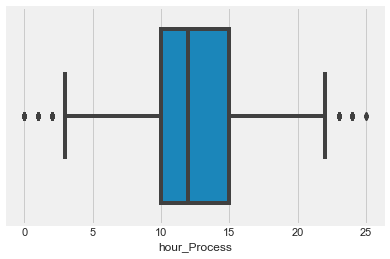

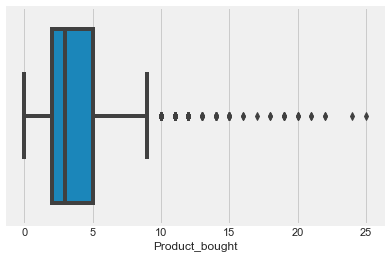

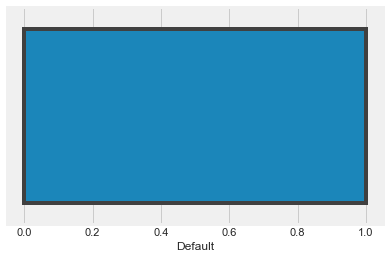

In [11]:
splot_cols=df_train.columns
for i in splot_cols:
    if df_train[i].dtype != 'object' and df_train[i].isnull().values.any() != True:
        sns.boxplot(df_train[i])
        plt.show()

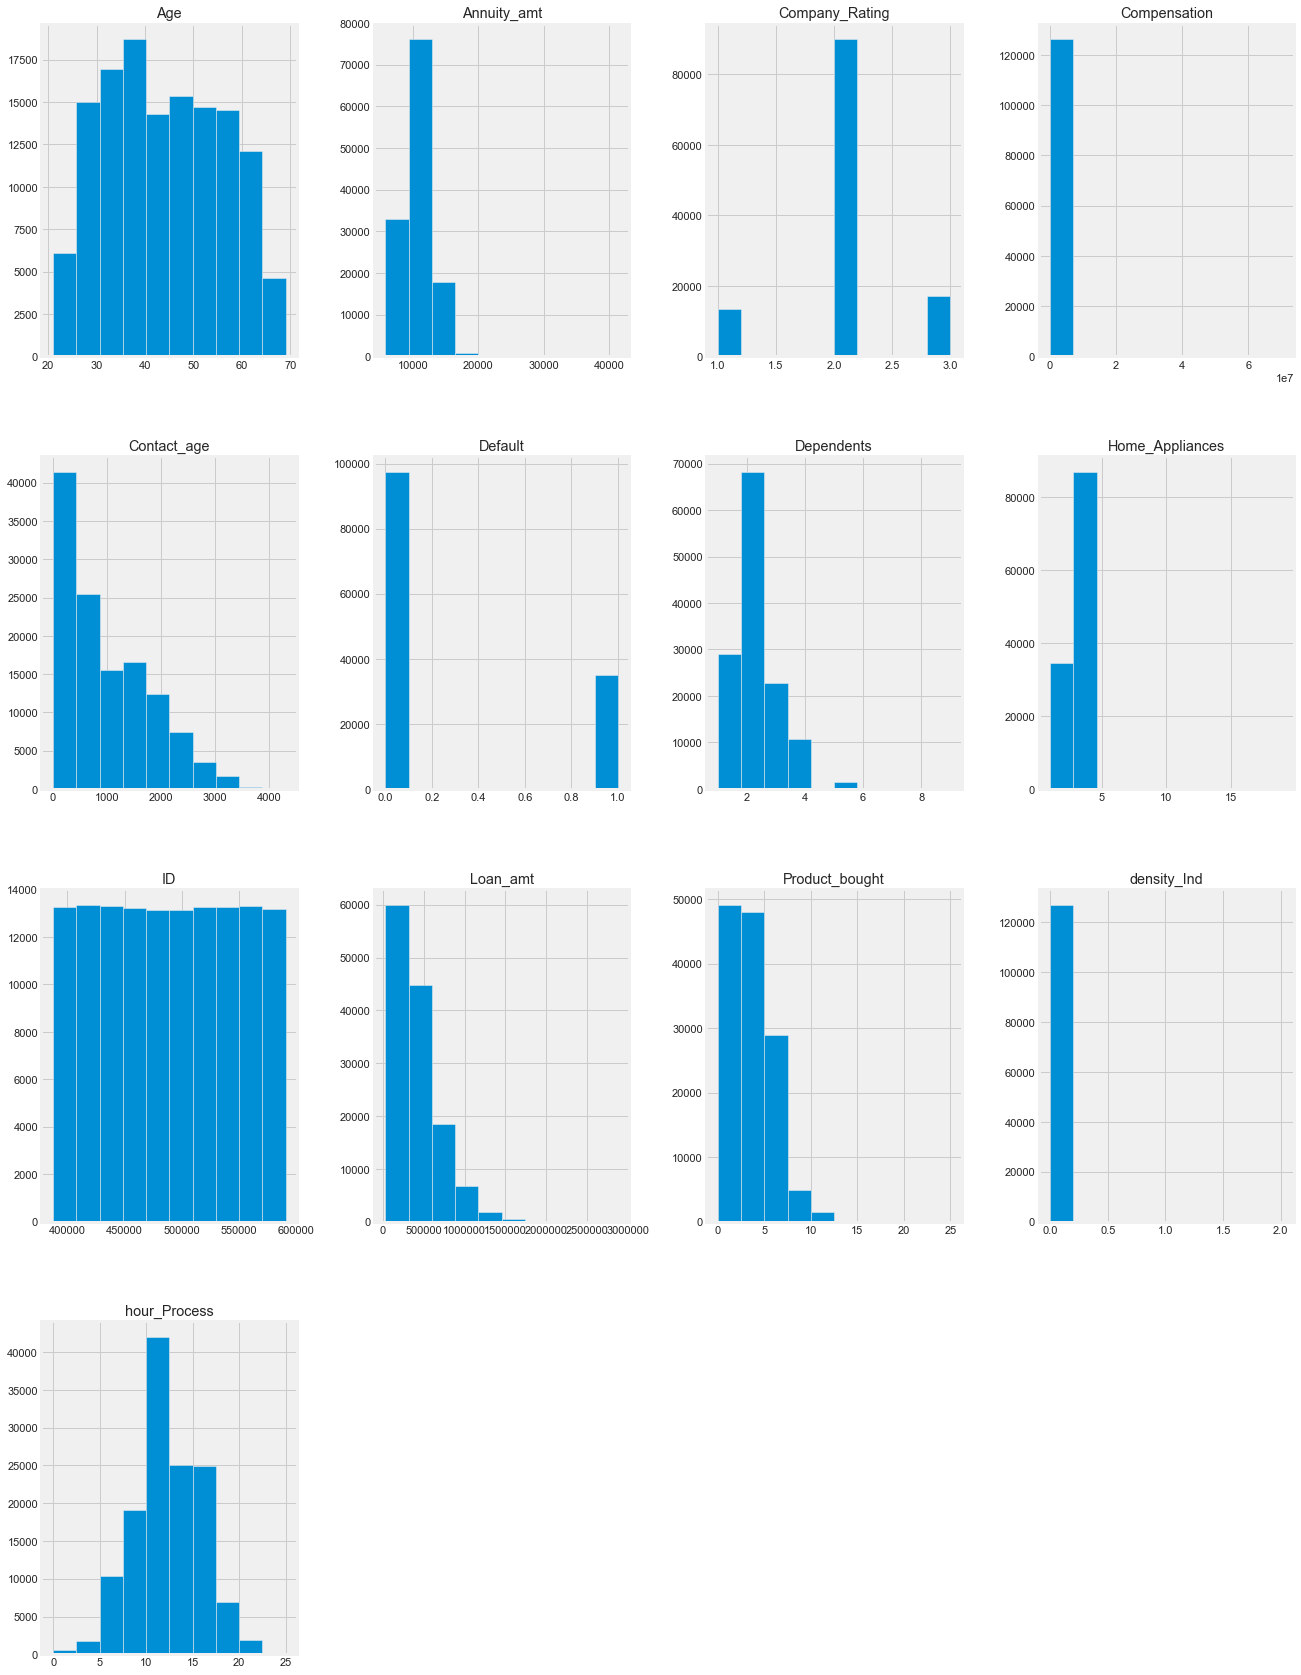

In [12]:
df_train.hist(figsize=(20,30));

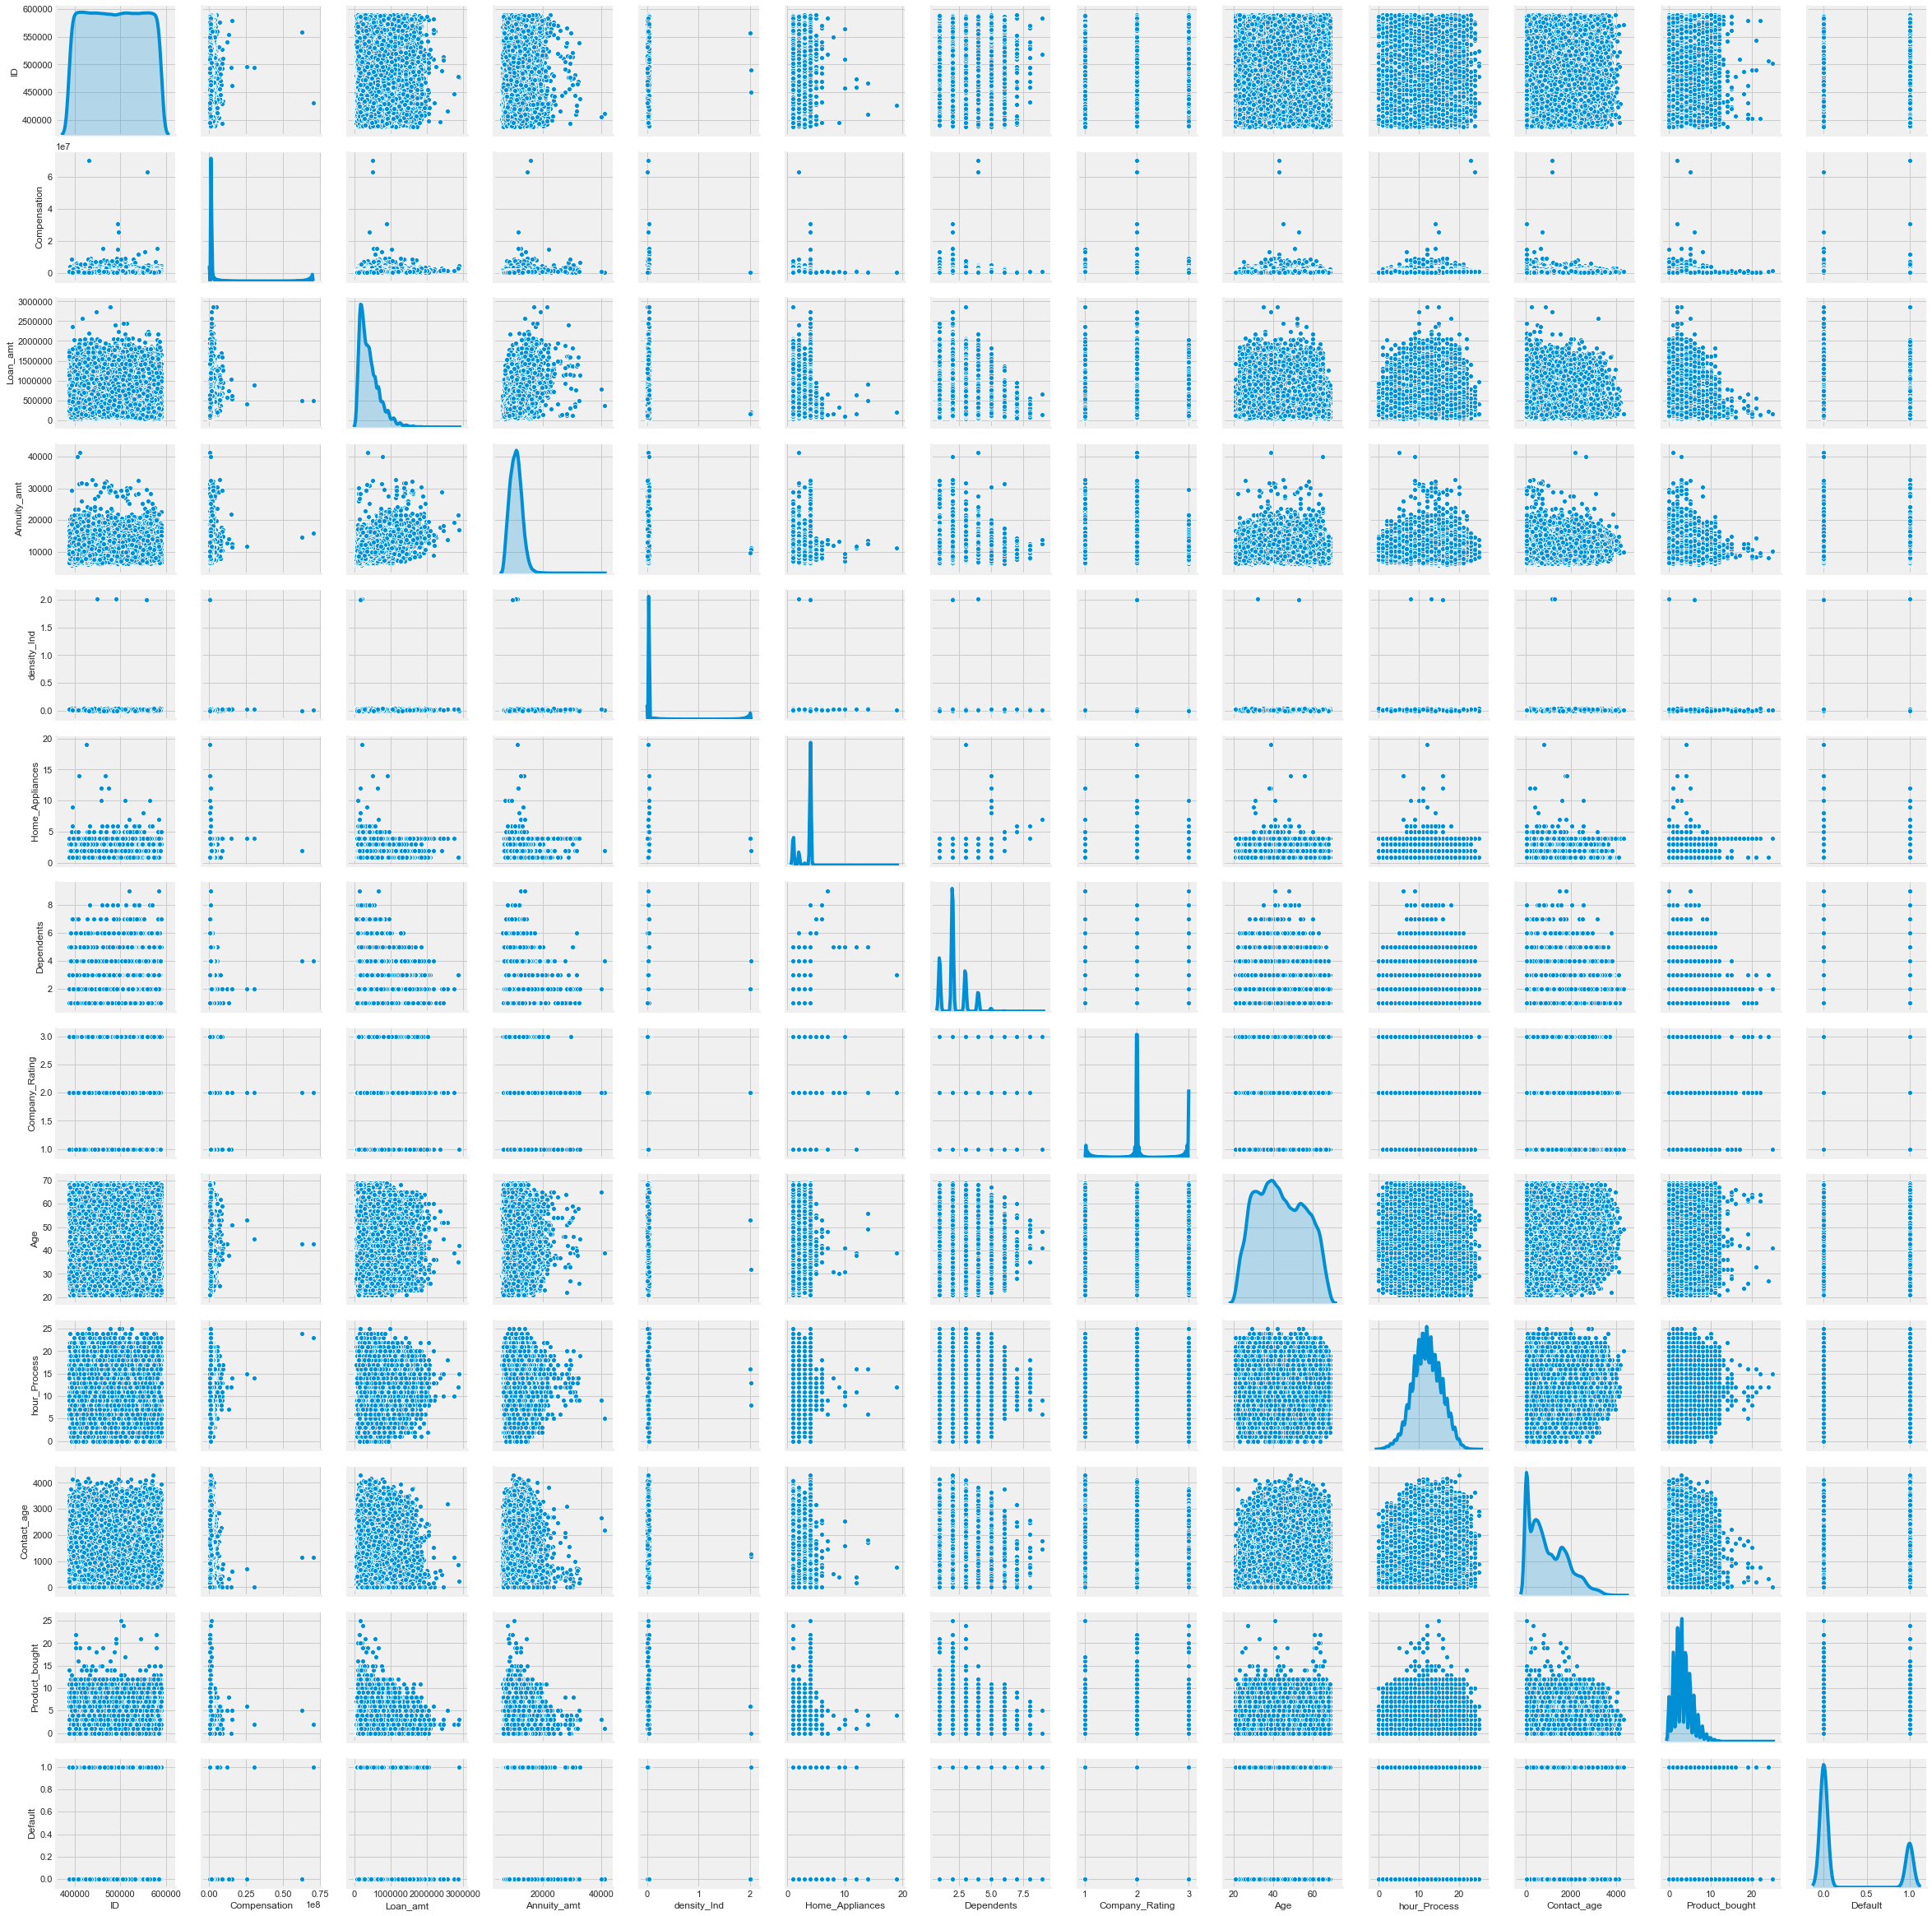

In [13]:
sns.pairplot(df_train,diag_kind='kde',palette="tab10")

In [14]:
df_train.corr()

ID  Compensation  Loan_amt  Annuity_amt  density_Ind  \
ID               1.000000      0.000663  0.001005     0.001591     0.001294   
Compensation     0.000663      1.000000  0.266282     0.240677     0.000676   
Loan_amt         0.001005      0.266282  1.000000     0.487726     0.000780   
Annuity_amt      0.001591      0.240677  0.487726     1.000000     0.002008   
density_Ind      0.001294      0.000676  0.000780     0.002008     1.000000   
Home_Appliances  0.002065     -0.027005  0.002664    -0.012353     0.001068   
Dependents       0.000616      0.028301  0.054520     0.051107    -0.000848   
Company_Rating   0.001091     -0.163948 -0.101911    -0.096917    -0.009716   
Age             -0.000608     -0.042217  0.049473    -0.006268    -0.001770   
hour_Process     0.000909      0.064352  0.042255     0.030093     0.003082   
Contact_age     -0.003894      0.033560  0.063308     0.040426    -0.003137   
Product_bought   0.001894      0.018357 -0.029405    -0.008943     0.000278   
Default          0.000072     -0.001455 -0.008946    -0.004134     0.000991   

                 Home_Appliances  Dependents  Company_Rating       Age  \
ID                      0.002065    0.000616        0.001091 -0.000608   
Compensation           -0.027005    0.028301       -0.163948 -0.042217   
Loan_amt                0.002664    0.054520       -0.101911  0.049473   
Annuity_amt            -0.012353    0.051107       -0.096917 -0.006268   
density_Ind             0.001068   -0.000848       -0.009716 -0.001770   
Home_Appliances         1.000000   -0.618543       -0.010596  0.330201   
Dependents             -0.618543    1.000000        0.030451 -0.264799   
Company_Rating         -0.010596    0.030451        1.000000 -0.006189   
Age                     0.330201   -0.264799       -0.006189  1.000000   
hour_Process            0.001249   -0.011311       -0.232106 -0.076291   
Contact_age            -0.007108    0.027048       -0.024565  0.077793   
Product_bought          0.030492   -0.017262        0.006244  0.052711   
Default                -0.003848    0.002355        0.015499 -0.023211   

                 hour_Process  Contact_age  Product_bought   Default  
ID                   0.000909    -0.003894        0.001894  0.000072  
Compensation         0.064352     0.033560        0.018357 -0.001455  
Loan_amt             0.042255     0.063308       -0.029405 -0.008946  
Annuity_amt          0.030093     0.040426       -0.008943 -0.004134  
density_Ind          0.003082    -0.003137        0.000278  0.000991  
Home_Appliances      0.001249    -0.007108        0.030492 -0.003848  
Dependents          -0.011311     0.027048       -0.017262  0.002355  
Company_Rating      -0.232106    -0.024565        0.006244  0.015499  
Age                 -0.076291     0.077793        0.052711 -0.023211  
hour_Process         1.000000     0.013144       -0.019775 -0.007573  
Contact_age          0.013144     1.000000        0.078508 -0.014431  
Product_bought      -0.019775     0.078508        1.000000  0.006387  
Default             -0.007573    -0.014431        0.006387  1.000000

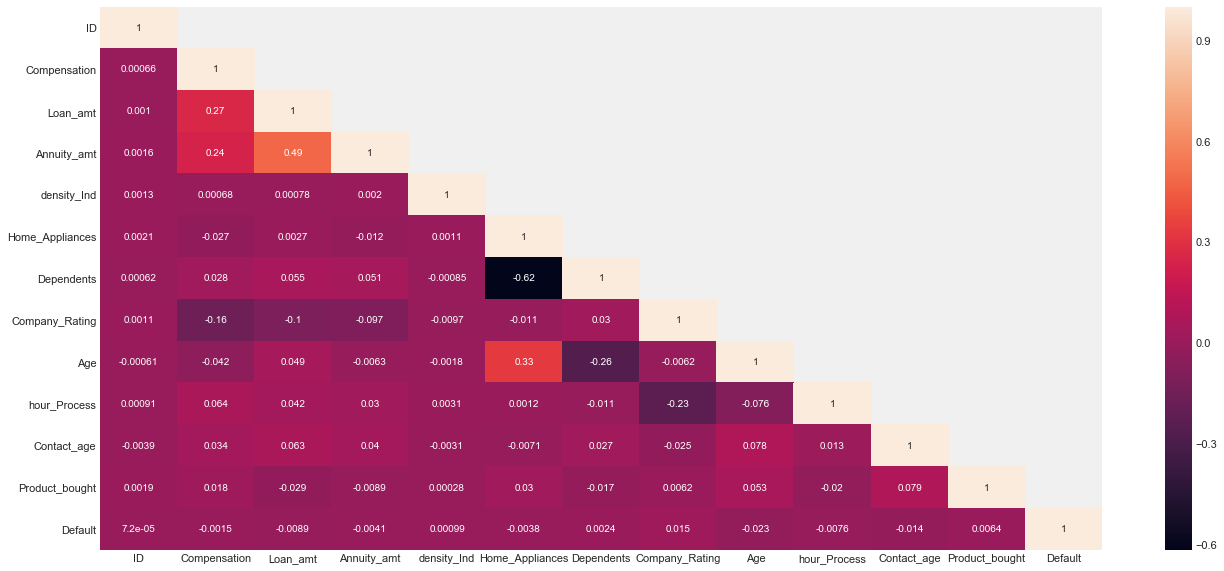

In [15]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_train.corr(), annot=True,mask=np.triu(df_train.corr(),+1))

### Treating Null values

In [16]:
df_train.isnull().sum()

ID                        0
Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Income_Alt             7682
Day_Process               0
Ph_No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64

In [17]:
for column in df_train.columns:
    if df_train[column].dtype != 'object':
        median = df_train[column].median()
        df_train[column] = df_train[column].fillna(median)    
        
df_train.isnull().sum() 

ID                        0
Compensation              0
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt               0
density_Ind               0
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances           0
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Income_Alt             7682
Day_Process               0
Ph_No                     0
Type_Loan                 0
Dependents                0
Company_Rating            0
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
Contact_age               0
Product_bought            0
Default                   0
dtype: int64

In [18]:
for column in df_train:
    if df_train[column].dtype == 'object':
        if df_train[column].isnull().any():
#             if(column in cateogry_columns):
                df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
df_train.isnull().sum() 

ID                    0
Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Income_Alt            0
Day_Process           0
Ph_No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
Contact_age           0
Product_bought        0
Default               0
dtype: int64

In [19]:
df_train.head()

ID  Compensation Vehicle_Status  Loan_amt  Annuity_amt  density_Ind  \
0  540071      801850.0              Y  658040.0     13816.52       0.0304   
1  511643      884222.0              N  198075.0     11173.06       0.0194   
2  506688      284120.0              N  101056.0      8390.40       0.0118   
3  499360      341874.0              N  179008.0      7184.13       0.0373   
4  438350     1259895.0              Y  573715.0     13212.77       0.0138   

  Job_Type Default_hist     Prop_List  Home_Appliances Region_Type Credit_Inq  \
0       IT          ndf  Morethan_One              4.0       Metro          1   
1       IT          ndf  Morethan_One              1.0       Metro          2   
2    Govt.          ndf           One              4.0       Metro          3   
3   Non-IT           df          None              2.0       Metro          1   
4   Non-IT          ndf  Morethan_One              1.0       Rural          2   

  Education_det Marital_Stat Gen Credit_Lnks     Income_Alt Day_Process Ph_No  \
0          Grad      Married   F      1_to_3  Not_Specified         SAT   Yes   
1          Grad      Married   M      1_to_3  Not_Specified         wed   Yes   
2         Other      Married   M      1_to_3  Not_Specified         mon   Yes   
3          Grad      Married   M      1_to_3  Not_Specified         wed   Yes   
4          Grad      Married   F      4_to_6              Y         Sun   Yes   

  Type_Loan  Dependents  Company_Rating Region   Age  hour_Process  \
0     CLoan         3.0             2.0   East  46.0          10.0   
1     CLoan         3.0             1.0  North  46.0          12.0   
2     CLoan         2.0             3.0  North  57.0           5.0   
3     RLoan         4.0             2.0  South  39.0          12.0   
4     CLoan         3.0             1.0  North  32.0          16.0   

  Addr_permanent Permanent_Addr_tag  Contact_age  Product_bought  Default  
0            Yes                 No         18.0             2.0      1.0  
1            Yes                Yes        306.0             4.0      0.0  
2            Yes                Yes        281.0             4.0      0.0  
3            Yes                Yes         20.0             4.0      0.0  
4            Yes                Yes       2339.0             6.0      0.0

In [20]:
df_train['Default'] = df_train['Default'].astype('int64')

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 30 columns):
ID                    132440 non-null int64
Compensation          132440 non-null float64
Vehicle_Status        132440 non-null object
Loan_amt              132440 non-null float64
Annuity_amt           132440 non-null float64
density_Ind           132440 non-null float64
Job_Type              132440 non-null object
Default_hist          132440 non-null object
Prop_List             132440 non-null object
Home_Appliances       132440 non-null float64
Region_Type           132440 non-null object
Credit_Inq            132440 non-null object
Education_det         132440 non-null object
Marital_Stat          132440 non-null object
Gen                   132440 non-null object
Credit_Lnks           132440 non-null object
Income_Alt            132440 non-null object
Day_Process           132440 non-null object
Ph_No                 132440 non-null object
Type_Loan             132440 n

In [22]:
df_train.head()

ID  Compensation Vehicle_Status  Loan_amt  Annuity_amt  density_Ind  \
0  540071      801850.0              Y  658040.0     13816.52       0.0304   
1  511643      884222.0              N  198075.0     11173.06       0.0194   
2  506688      284120.0              N  101056.0      8390.40       0.0118   
3  499360      341874.0              N  179008.0      7184.13       0.0373   
4  438350     1259895.0              Y  573715.0     13212.77       0.0138   

  Job_Type Default_hist     Prop_List  Home_Appliances Region_Type Credit_Inq  \
0       IT          ndf  Morethan_One              4.0       Metro          1   
1       IT          ndf  Morethan_One              1.0       Metro          2   
2    Govt.          ndf           One              4.0       Metro          3   
3   Non-IT           df          None              2.0       Metro          1   
4   Non-IT          ndf  Morethan_One              1.0       Rural          2   

  Education_det Marital_Stat Gen Credit_Lnks     Income_Alt Day_Process Ph_No  \
0          Grad      Married   F      1_to_3  Not_Specified         SAT   Yes   
1          Grad      Married   M      1_to_3  Not_Specified         wed   Yes   
2         Other      Married   M      1_to_3  Not_Specified         mon   Yes   
3          Grad      Married   M      1_to_3  Not_Specified         wed   Yes   
4          Grad      Married   F      4_to_6              Y         Sun   Yes   

  Type_Loan  Dependents  Company_Rating Region   Age  hour_Process  \
0     CLoan         3.0             2.0   East  46.0          10.0   
1     CLoan         3.0             1.0  North  46.0          12.0   
2     CLoan         2.0             3.0  North  57.0           5.0   
3     RLoan         4.0             2.0  South  39.0          12.0   
4     CLoan         3.0             1.0  North  32.0          16.0   

  Addr_permanent Permanent_Addr_tag  Contact_age  Product_bought  Default  
0            Yes                 No         18.0             2.0        1  
1            Yes                Yes        306.0             4.0        0  
2            Yes                Yes        281.0             4.0        0  
3            Yes                Yes         20.0             4.0        0  
4            Yes                Yes       2339.0             6.0        0

In [23]:
df_cat_train = df_train.select_dtypes(include = ['object'])
df_num_train = df_train.select_dtypes(include = ['float64','int64'])

In [24]:
df_cat_train = pd.get_dummies(df_cat_train, drop_first = True)
df_cat_train.head()

Vehicle_Status_Y  Job_Type_IT  Job_Type_Non-IT  Default_hist_ndf  \
0                 1            1                0                 1   
1                 0            1                0                 1   
2                 0            0                0                 1   
3                 0            0                1                 0   
4                 1            0                1                 1   

   Prop_List_None  Prop_List_One  Region_Type_Rural  Region_Type_other  \
0               0              0                  0                  0   
1               0              0                  0                  0   
2               0              1                  0                  0   
3               1              0                  0                  0   
4               0              0                  1                  0   

   Credit_Inq_2  Credit_Inq_3  Credit_Inq_>4  Education_det_Other  \
0             0             0              0                    0   
1             1             0              0                    0   
2             0             1              0                    1   
3             0             0              0                    0   
4             1             0              0                    0   

   Education_det_P_Grad  Marital_Stat_Married  Marital_Stat_Single  \
0                     0                     1                    0   
1                     0                     1                    0   
2                     0                     1                    0   
3                     0                     1                    0   
4                     0                     1                    0   

   Marital_Stat_Widow  Gen_M  Credit_Lnks_4_to_6  Credit_Lnks_>6  \
0                   0      0                   0               0   
1                   0      1                   0               0   
2                   0      1                   0               0   
3                   0      1                   0               0   
4                   0      0                   1               0   

   Income_Alt_Y  Day_Process_SAT  Day_Process_Sun  Day_Process_Tue  \
0             0                1                0                0   
1             0                0                0                0   
2             0                0                0                0   
3             0                0                0                0   
4             1                0                1                0   

   Day_Process_mon  Day_Process_thur  Day_Process_wed  Ph_No_Yes  \
0                0                 0                0          1   
1                0                 0                1          1   
2                1                 0                0          1   
3                0                 0                1          1   
4                0                 0                0          1   

   Type_Loan_RLoan  Region_East  Region_North  Region_South  \
0                0            1             0             0   
1                0            0             1             0   
2                0            0             1             0   
3                1            0             0             1   
4                0            0             1             0   

   Addr_permanent_Yes  Permanent_Addr_tag_Yes  
0                   1                       0  
1                   1                       1  
2                   1                       1  
3                   1                       1  
4                   1                       1

In [25]:
# df_train_copy1 = pd.concat([df_cat_train,df_num_train],axis=1)
df_train_copy2 = pd.concat([df_cat_train,df_num_train],axis=1)
df_train_copy2.head()

Vehicle_Status_Y  Job_Type_IT  Job_Type_Non-IT  Default_hist_ndf  \
0                 1            1                0                 1   
1                 0            1                0                 1   
2                 0            0                0                 1   
3                 0            0                1                 0   
4                 1            0                1                 1   

   Prop_List_None  Prop_List_One  Region_Type_Rural  Region_Type_other  \
0               0              0                  0                  0   
1               0              0                  0                  0   
2               0              1                  0                  0   
3               1              0                  0                  0   
4               0              0                  1                  0   

   Credit_Inq_2  Credit_Inq_3  Credit_Inq_>4  Education_det_Other  \
0             0             0              0                    0   
1             1             0              0                    0   
2             0             1              0                    1   
3             0             0              0                    0   
4             1             0              0                    0   

   Education_det_P_Grad  Marital_Stat_Married  Marital_Stat_Single  \
0                     0                     1                    0   
1                     0                     1                    0   
2                     0                     1                    0   
3                     0                     1                    0   
4                     0                     1                    0   

   Marital_Stat_Widow  Gen_M  Credit_Lnks_4_to_6  Credit_Lnks_>6  \
0                   0      0                   0               0   
1                   0      1                   0               0   
2                   0      1                   0               0   
3                   0      1                   0               0   
4                   0      0                   1               0   

   Income_Alt_Y  Day_Process_SAT  Day_Process_Sun  Day_Process_Tue  \
0             0                1                0                0   
1             0                0                0                0   
2             0                0                0                0   
3             0                0                0                0   
4             1                0                1                0   

   Day_Process_mon  Day_Process_thur  Day_Process_wed  Ph_No_Yes  \
0                0                 0                0          1   
1                0                 0                1          1   
2                1                 0                0          1   
3                0                 0                1          1   
4                0                 0                0          1   

   Type_Loan_RLoan  Region_East  Region_North  Region_South  \
0                0            1             0             0   
1                0            0             1             0   
2                0            0             1             0   
3                1            0             0             1   
4                0            0             1             0   

   Addr_permanent_Yes  Permanent_Addr_tag_Yes      ID  Compensation  Loan_amt  \
0                   1                       0  540071      801850.0  658040.0   
1                   1                       1  511643      884222.0  198075.0   
2                   1                       1  506688      284120.0  101056.0   
3                   1                       1  499360      341874.0  179008.0   
4                   1                       1  438350     1259895.0  573715.0   

   Annuity_amt  density_Ind  Home_Appliances  Dependents  Company_Rating  \
0     13816.52       0.0304              4.0         3.0             2.0   
1     11173.06       0.0194           

In [26]:
# df_train_copy1 = df_train_copy1.drop(columns=['ID'], axis=1)
df_train_copy2 = df_train_copy2.drop(columns=['ID'], axis=1)
df_train_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 45 columns):
Vehicle_Status_Y          132440 non-null uint8
Job_Type_IT               132440 non-null uint8
Job_Type_Non-IT           132440 non-null uint8
Default_hist_ndf          132440 non-null uint8
Prop_List_None            132440 non-null uint8
Prop_List_One             132440 non-null uint8
Region_Type_Rural         132440 non-null uint8
Region_Type_other         132440 non-null uint8
Credit_Inq_2              132440 non-null uint8
Credit_Inq_3              132440 non-null uint8
Credit_Inq_>4             132440 non-null uint8
Education_det_Other       132440 non-null uint8
Education_det_P_Grad      132440 non-null uint8
Marital_Stat_Married      132440 non-null uint8
Marital_Stat_Single       132440 non-null uint8
Marital_Stat_Widow        132440 non-null uint8
Gen_M                     132440 non-null uint8
Credit_Lnks_4_to_6        132440 non-null uint8
Credit_Lnks_>6           

In [27]:
# x = df_train_copy1.drop('Default', axis=1)

# y = df_train_copy1['Default']

In [28]:
x = df_train_copy2.drop('Default', axis=1)

y = df_train_copy2['Default']

In [29]:
# from scipy.stats import zscore
# x = x.apply(zscore)
# # train_scaled = pd.concat([df_cat_train,df_num_train],axis=1)
# x.head()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(x.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[x.columns])
df_scaled.head()

Vehicle_Status_Y Job_Type_IT Job_Type_Non-IT Default_hist_ndf  \
0              1.0         1.0             0.0              1.0   
1              0.0         1.0             0.0              1.0   
2              0.0         0.0             0.0              1.0   
3              0.0         0.0             1.0              0.0   
4              1.0         0.0             1.0              1.0   

  Prop_List_None Prop_List_One Region_Type_Rural Region_Type_other  \
0            0.0           0.0               0.0               0.0   
1            0.0           0.0               0.0               0.0   
2            0.0           1.0               0.0               0.0   
3            1.0           0.0               0.0               0.0   
4            0.0           0.0               1.0               0.0   

  Credit_Inq_2 Credit_Inq_3 Credit_Inq_>4 Education_det_Other  \
0          0.0          0.0           0.0                 0.0   
1          1.0          0.0           0.0                 0.0   
2          0.0          1.0           0.0                 1.0   
3          0.0          0.0           0.0                 0.0   
4          1.0          0.0           0.0                 0.0   

  Education_det_P_Grad Marital_Stat_Married Marital_Stat_Single  \
0                  0.0                  1.0                 0.0   
1                  0.0                  1.0                 0.0   
2                  0.0                  1.0                 0.0   
3                  0.0                  1.0                 0.0   
4                  0.0                  1.0                 0.0   

  Marital_Stat_Widow Gen_M Credit_Lnks_4_to_6 Credit_Lnks_>6 Income_Alt_Y  \
0                0.0   0.0                0.0            0.0          0.0   
1                0.0   1.0                0.0            0.0          0.0   
2                0.0   1.0                0.0            0.0          0.0   
3                0.0   1.0                0.0            0.0          0.0   
4                0.0   0.0                1.0            0.0          1.0   

  Day_Process_SAT Day_Process_Sun Day_Process_Tue Day_Process_mon  \
0             1.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             1.0   
3             0.0             0.0             0.0             0.0   
4             0.0             1.0             0.0             0.0   

  Day_Process_thur Day_Process_wed Ph_No_Yes Type_Loan_RLoan Region_East  \
0              0.0             0.0       1.0             0.0         1.0   
1              0.0             1.0       1.0             0.0         0.0   
2              0.0             0.0       1.0             0.0         0.0   
3              0.0             1.0       1.0             1.0         0.0   
4              0.0             0.0       1.0             0.0         0.0   

  Region_North Region_South Addr_permanent_Yes Permanent_Addr_tag_Yes  \
0          0.0          0.0                1.0                    0.0   
1          1.0          0.0                1.0                    1.0   
2          1.0          0.0                1.0                    1.0   
3          0.0          1.0                1.0                    1.0   
4          1.0          0.0                1.0                    1.0   

  Compensation  Loan_amt Annuity_amt density_Ind Home_Appliances Dependents  \
0     0.009244  0.219801    0.224673    0.015017        0.166667      0.250   
1     0.010417  0.057719    0.150102    0.009565        0.000000      0.250   
2     0.001871  0.023532    0.071604    0.005799        0.166667      0.125   
3     0.002693  0.051001    0.037576    0.018437        0.055556      0.375   
4     0.015766  0.190086    0.207642    0.006790        0.000000      0.250   

  Company_Rating       Age hour_Process Contact_age Product_bought  
0            0.5  0.520833         0.40    0.001861           0.08

In [30]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42,stratify=y)
# x_train.shape

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2 , random_state=42,stratify=y)
x_train.shape

(105952, 44)

In [32]:
y_train.shape

(105952,)

In [33]:
x_test.shape

(26488, 44)

In [34]:
y_test.shape

(26488,)

### Logistic Regression 

In [35]:
model = LogisticRegression(n_jobs=-1)
model.fit(x_train, y_train)

LogisticRegression(n_jobs=-1)

In [36]:
ytrain_predict = model.predict(x_train)
ytrain_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
ytest_predict = model.predict(x_test)
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
Logistic_regression_wgs = model.score(x_test, y_test)
Logistic_regression_wgs

0.7356916339474479

In [39]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     77949
           1       0.00      0.00      0.00     28003

    accuracy                           0.74    105952
   macro avg       0.37      0.50      0.42    105952
weighted avg       0.54      0.74      0.62    105952
 



In [40]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     19487
           1       0.00      0.00      0.00      7001

    accuracy                           0.74     26488
   macro avg       0.37      0.50      0.42     26488
weighted avg       0.54      0.74      0.62     26488
 



### Logistic Regression with grid search cv

In [41]:
# grid={'penalty':['l1','l2','none'],
#       'solver':['lbfgs', 'liblinear'],
#       'tol':[0.0001,0.000001]}

In [42]:
grid2={'penalty':['l1','l2','none'],
      'solver':[ 'lbfgs','liblinear'],
      'tol':[0.0001,0.00001]}

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [44]:
# grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
# grid_search.fit(x_train, y_train)

In [45]:
grid_search_LR = RandomizedSearchCV(estimator = model, param_distributions = grid2, cv = 3,n_jobs=-1,scoring='f1')
grid_search_LR.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(max_iter=100000, n_jobs=2),
                   n_jobs=-1,
                   param_distributions={'penalty': ['l1', 'l2', 'none'],
                                        'solver': ['lbfgs', 'liblinear'],
                                        'tol': [0.0001, 1e-05]},
                   scoring='f1')

In [46]:
grid_search_LR.best_params_

{'tol': 0.0001, 'solver': 'lbfgs', 'penalty': 'none'}

In [47]:
best_model = grid_search_LR.best_estimator_
best_model

LogisticRegression(max_iter=100000, n_jobs=2, penalty='none')

In [48]:
ytrain_predict = best_model.predict(x_train)
ytrain_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
ytest_predict = best_model.predict(x_test)
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
Logistic_regression = grid_search_LR.score(x_test, y_test)
Logistic_regression

0.0

In [51]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     77949
           1       0.50      0.00      0.00     28003

    accuracy                           0.74    105952
   macro avg       0.62      0.50      0.42    105952
weighted avg       0.67      0.74      0.62    105952
 



In [52]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     19487
           1       0.00      0.00      0.00      7001

    accuracy                           0.74     26488
   macro avg       0.37      0.50      0.42     26488
weighted avg       0.54      0.74      0.62     26488
 



In [53]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
lr_metrics1=classification_report(y_train, ytrain_predict,output_dict=True)

dftra=pd.DataFrame(lr_metrics).transpose()
dftra1=pd.DataFrame(lr_metrics1).transpose()
lr_test_f1=round(dftra.loc["1"][0],2)
lr_train_f1=round(dftra1.loc["1"][0],2)
print ('lr_test_f1 ',lr_test_f1)
print ('lr_train_f1 ',lr_train_f1)

lr_test_f1  0.0
lr_train_f1  0.0


In [54]:
resultsDf = pd.DataFrame({'f1 test':lr_test_f1,'f1 train': lr_train_f1},index=['Logistic Regression'])
resultsDf

f1 test  f1 train
Logistic Regression      0.0       0.0

### Random Forest

In [55]:
rfcl_wgs = RandomForestClassifier(random_state=42) 
rfcl_wgs = rfcl_wgs.fit(x_train, y_train)

In [56]:
ytrain_predict = rfcl_wgs.predict(x_train)
ytrain_predict

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [57]:
ytest_predict = rfcl_wgs.predict(x_test)
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77949
           1       1.00      1.00      1.00     28003

    accuracy                           1.00    105952
   macro avg       1.00      1.00      1.00    105952
weighted avg       1.00      1.00      1.00    105952
 



In [59]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     19487
           1       0.48      0.00      0.00      7001

    accuracy                           0.74     26488
   macro avg       0.61      0.50      0.43     26488
weighted avg       0.67      0.74      0.62     26488
 



### Random Forest with grid search cv

param_grid_RF = {'max_depth': [20, 40, 60, 80, 100, 120],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [150, 200, 250]}

In [60]:
param_grid_RF = {'max_depth': [20, 40, 60, 80],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [100,150, 200]}

In [61]:
rfcl = RandomForestClassifier(random_state=42)

rfcl = RandomizedSearchCV(estimator = rfcl, param_distributions = param_grid_RF, cv = 3) 
rfcl = rfcl.fit(x_train, y_train)

In [62]:
rfcl.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 60}

In [63]:
rfcl = rfcl.best_estimator_

In [64]:
ytrain_predict = rfcl.predict(x_train)
ytrain_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
ytest_predict = rfcl.predict(x_test)
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     77949
           1       1.00      0.14      0.24     28003

    accuracy                           0.77    105952
   macro avg       0.88      0.57      0.55    105952
weighted avg       0.83      0.77      0.70    105952
 



In [67]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     19487
           1       0.00      0.00      0.00      7001

    accuracy                           0.74     26488
   macro avg       0.37      0.50      0.42     26488
weighted avg       0.54      0.74      0.62     26488
 



In [68]:
rf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
rf_metrics1=classification_report(y_train, ytrain_predict,output_dict=True)
dftrf=pd.DataFrame(rf_metrics).transpose()
dftrf1=pd.DataFrame(rf_metrics1).transpose()
rf_test_f1=round(dftrf.loc["1"][0],2)
rf_train_f1=round(dftrf1.loc["1"][0],2)
print ('rf_test_f1 ',rf_test_f1)
print ('rf_train_f1 ',rf_train_f1)

rf_test_f1  0.0
rf_train_f1  0.24


In [69]:
resultsDf1 = pd.DataFrame({'f1 test':rf_test_f1,'f1 train':rf_train_f1},index=['Random Forest'])
resultsDf = pd.concat([resultsDf,resultsDf1],axis=0)
resultsDf

f1 test  f1 train
Logistic Regression      0.0      0.00
Random Forest            0.0      0.24

### Decision Tree classifier

In [70]:
dt_class = DecisionTreeClassifier(random_state=1024)
dt_class.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1024)

In [71]:
ytrain_predict = dt_class.predict(x_train)
ytrain_predict

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [72]:
ytest_predict = dt_class.predict(x_test)
ytest_predict

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [73]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77949
           1       1.00      1.00      1.00     28003

    accuracy                           1.00    105952
   macro avg       1.00      1.00      1.00    105952
weighted avg       1.00      1.00      1.00    105952
 



In [74]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     19487
           1       0.28      0.30      0.29      7001

    accuracy                           0.61     26488
   macro avg       0.51      0.51      0.51     26488
weighted avg       0.62      0.61      0.61     26488
 



### Decision Tree classifier with grid search cv

In [75]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = RandomizedSearchCV(estimator=tree_clas, param_distributions=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
                   param_distributions={'ccp_alpha': [0.1, 0.01, 0.001],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']},
                   verbose=True)

In [76]:
grid_search.best_params_

{'max_features': 'auto',
 'max_depth': 8,
 'criterion': 'entropy',
 'ccp_alpha': 0.001}

In [77]:
grid_search = grid_search.best_estimator_

In [78]:
ytrain_predict = grid_search.predict(x_train)
ytrain_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
ytest_predict = grid_search.predict(x_test)
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     77949
           1       0.00      0.00      0.00     28003

    accuracy                           0.74    105952
   macro avg       0.37      0.50      0.42    105952
weighted avg       0.54      0.74      0.62    105952
 



In [81]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     19487
           1       0.00      0.00      0.00      7001

    accuracy                           0.74     26488
   macro avg       0.37      0.50      0.42     26488
weighted avg       0.54      0.74      0.62     26488
 



In [82]:
dt_metrics=classification_report(y_test, ytest_predict,output_dict=True)
dt_metrics1=classification_report(y_train, ytrain_predict,output_dict=True)
dt=pd.DataFrame(dt_metrics).transpose()
dt1=pd.DataFrame(dt_metrics1).transpose()
dt_test_f1=round(dt.loc["1"][0],2)
dt_train_f1=round(dt1.loc["1"][0],2)
print ('dt_test_f1 ',dt_test_f1)
print ('dt_train_f1 ',dt_train_f1)

dt_test_f1  0.0
dt_train_f1  0.0


In [83]:
resultsDf1 = pd.DataFrame({'f1 test':dt_test_f1,'f1 train':dt_train_f1},index=['Decision Tree'])
resultsDf = pd.concat([resultsDf,resultsDf1],axis=0)
resultsDf

f1 test  f1 train
Logistic Regression      0.0      0.00
Random Forest            0.0      0.24
Decision Tree            0.0      0.00

### LDA

In [84]:
LDA_wgs = LinearDiscriminantAnalysis()
LDA_wgs.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [85]:
ytrain_predict = LDA_wgs.predict(x_train)
ytrain_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
ytest_predict = LDA_wgs.predict(x_test)
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     77949
           1       0.50      0.00      0.00     28003

    accuracy                           0.74    105952
   macro avg       0.62      0.50      0.42    105952
weighted avg       0.67      0.74      0.62    105952
 



In [88]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     19487
           1       0.00      0.00      0.00      7001

    accuracy                           0.74     26488
   macro avg       0.37      0.50      0.42     26488
weighted avg       0.54      0.74      0.62     26488
 



### LDA with grid search cv

In [89]:
param_grid = {'solver': ['svd', 'lsqr', 'eigen'],
              'shrinkage': [0.1, .01, .001],
#               'n_components' : [10,15,20,25,30,35],
              'tol' :[0.001,0.0001,0.00001]
             }
tree_clas = LinearDiscriminantAnalysis()
LDA_search = RandomizedSearchCV(estimator=tree_clas, param_distributions=param_grid, cv=5, verbose=True)
LDA_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
                   param_distributions={'shrinkage': [0.1, 0.01, 0.001],
                                        'solver': ['svd', 'lsqr', 'eigen'],
                                        'tol': [0.001, 0.0001, 1e-05]},
                   verbose=True)

In [90]:
LDA_search.best_params_

{'tol': 1e-05, 'solver': 'eigen', 'shrinkage': 0.1}

In [91]:
LDA_search = LDA_search.best_estimator_

In [92]:
ytrain_predict = LDA_search.predict(x_train)
ytrain_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
ytest_predict = LDA_search.predict(x_test)
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     77949
           1       0.00      0.00      0.00     28003

    accuracy                           0.74    105952
   macro avg       0.37      0.50      0.42    105952
weighted avg       0.54      0.74      0.62    105952
 



In [95]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     19487
           1       0.00      0.00      0.00      7001

    accuracy                           0.74     26488
   macro avg       0.37      0.50      0.42     26488
weighted avg       0.54      0.74      0.62     26488
 



In [96]:
lda_metrics=classification_report(y_test, ytest_predict,output_dict=True)
lda_metrics1=classification_report(y_train, ytrain_predict,output_dict=True)
lda=pd.DataFrame(lda_metrics).transpose()
lda1=pd.DataFrame(lda_metrics1).transpose()
lda_test_f1=round(lda.loc["1"][0],2)
lda_train_f1=round(lda1.loc["1"][0],2)
print ('lda_test_f1 ',lda_test_f1)
print ('lda_train_f1 ',lda_train_f1)

lda_test_f1  0.0
lda_train_f1  0.0


In [97]:
resultsDf1 = pd.DataFrame({'f1 test':lda_test_f1,'f1 train':lda_train_f1},index=['LDA'])
resultsDf = pd.concat([resultsDf,resultsDf1],axis=0)
resultsDf

f1 test  f1 train
Logistic Regression      0.0      0.00
Random Forest            0.0      0.24
Decision Tree            0.0      0.00
LDA                      0.0      0.00

### Artificial Neural Network

In [99]:
from sklearn.neural_network import MLPClassifier
ANN_wgs = MLPClassifier(random_state=42)
ANN_wgs.fit(x_train, y_train)

MLPClassifier(random_state=42)

In [100]:
ytrain_predict = ANN_wgs.predict(x_train)
ytrain_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
ytest_predict = ANN_wgs.predict(x_test)
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      0.99      0.85     77949
           1       0.62      0.04      0.08     28003

    accuracy                           0.74    105952
   macro avg       0.68      0.52      0.47    105952
weighted avg       0.71      0.74      0.65    105952
 



In [103]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      0.98      0.84     19487
           1       0.24      0.02      0.04      7001

    accuracy                           0.72     26488
   macro avg       0.49      0.50      0.44     26488
weighted avg       0.60      0.72      0.63     26488
 



### Artificial Neural Network  with grid search cv

In [104]:
param_grid_ANN = { 'hidden_layer_sizes': [97,99,102,105],
                  'activation': [ 'relu'], 
                  'max_iter': [12500], 
                  'solver': ['adam'], 
                  'tol': [0.00001], }
ANN = MLPClassifier(random_state=42)


In [105]:
grid_search_ANN = GridSearchCV(estimator = ANN, param_grid = param_grid_ANN, cv = 3)
grid_search_ANN.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [97, 99, 102, 105],
                         'max_iter': [12500], 'solver': ['adam'],
                         'tol': [1e-05]})

In [106]:
grid_search_ANN.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 105,
 'max_iter': 12500,
 'solver': 'adam',
 'tol': 1e-05}

In [107]:
best_grid_ANN = grid_search_ANN.best_estimator_
best_grid_ANN

MLPClassifier(hidden_layer_sizes=105, max_iter=12500, random_state=42,
              tol=1e-05)

In [109]:
ytrain_predict = best_grid_ANN.predict(x_train)
ytrain_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
ytest_predict = best_grid_ANN.predict(x_test)
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     77949
           1       0.00      0.00      0.00     28003

    accuracy                           0.74    105952
   macro avg       0.37      0.50      0.42    105952
weighted avg       0.54      0.74      0.62    105952
 



In [112]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     19487
           1       0.00      0.00      0.00      7001

    accuracy                           0.74     26488
   macro avg       0.37      0.50      0.42     26488
weighted avg       0.54      0.74      0.62     26488
 



In [113]:
ANN_metrics=classification_report(y_test, ytest_predict,output_dict=True)
ANN_metrics1=classification_report(y_train, ytrain_predict,output_dict=True)
ANN=pd.DataFrame(ANN_metrics).transpose()
ANN1=pd.DataFrame(ANN_metrics1).transpose()
ANN_test_f1=round(ANN.loc["1"][0],2)
ANN_train_f1=round(ANN1.loc["1"][0],2)
print ('ANN_test_f1 ',ANN_test_f1)
print ('ANN_train_f1 ',ANN_train_f1)

ANN_test_f1  0.0
ANN_train_f1  0.0


In [114]:
resultsDf1 = pd.DataFrame({'f1 test':ANN_test_f1,'f1 train':ANN_train_f1},index=['ANN'])
resultsDf = pd.concat([resultsDf,resultsDf1],axis=0)
resultsDf

f1 test  f1 train
Logistic Regression      0.0      0.00
Random Forest            0.0      0.24
Decision Tree            0.0      0.00
LDA                      0.0      0.00
ANN                      0.0      0.00

### Gausian Naive bayes

In [115]:
gnb_wgs = GaussianNB()
gnb_wgs.fit(x_train, y_train)

GaussianNB()

In [116]:
train_predict_NNH = gnb_wgs.predict(x_train)
train_predict_NNH

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
test_predict_NNH = gnb_wgs.predict(x_test)
test_predict_NNH

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [118]:
print(classification_report(y_train, train_predict_NNH),'\n')

              precision    recall  f1-score   support

           0       0.74      0.98      0.84     77949
           1       0.28      0.02      0.04     28003

    accuracy                           0.73    105952
   macro avg       0.51      0.50      0.44    105952
weighted avg       0.62      0.73      0.63    105952
 



In [119]:
print(classification_report(y_test, test_predict_NNH),'\n')

              precision    recall  f1-score   support

           0       0.74      0.98      0.84     19487
           1       0.30      0.03      0.05      7001

    accuracy                           0.73     26488
   macro avg       0.52      0.50      0.44     26488
weighted avg       0.62      0.73      0.63     26488
 



### KNN

In [142]:
NNH_wgs = KNeighborsClassifier(n_jobs=-1)
NNH_wgs.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [143]:
train_predict_NNH = NNH_wgs.predict(x_train)
train_predict_NNH

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
test_predict_NNH = NNH_wgs.predict(x_test)
test_predict_NNH

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [145]:
print(classification_report(y_train, train_predict_NNH),'\n')

              precision    recall  f1-score   support

           0       0.79      0.94      0.86     77949
           1       0.64      0.29      0.39     28003

    accuracy                           0.77    105952
   macro avg       0.71      0.61      0.63    105952
weighted avg       0.75      0.77      0.73    105952
 



In [146]:
print(classification_report(y_test, test_predict_NNH),'\n')

              precision    recall  f1-score   support

           0       0.73      0.88      0.80     19487
           1       0.26      0.12      0.16      7001

    accuracy                           0.68     26488
   macro avg       0.50      0.50      0.48     26488
weighted avg       0.61      0.68      0.63     26488
 



In [120]:
 
# downloaded = drive.CreateFile({'id':id2})
# downloaded.GetContentFile('Test_Set_TVS.csv') 
df_test = pd.read_csv("Test_Set_TVS.csv")
df_test.head()

ID  Compensation Vehicle_Status   Loan_amt  Annuity_amt  density_Ind  \
0  487410      653106.0              Y  809400.00      9145.51       0.0015   
1  533258      434150.0              N   72618.75      7683.23       0.0332   
2  581926      489060.0              N  267255.80      9032.85       0.0316   
3  486301      957294.0              N  623600.00     12838.25       0.0320   
4  580822     1333739.0              N  529520.00     11799.09       0.0073   

  Job_Type Default_hist     Prop_List  Home_Appliances Region_Type Credit_Inq  \
0    Govt.          ndf  Morethan_One              1.0       Metro          1   
1    Govt.          ndf           One              4.0       Metro          1   
2       IT          ndf  Morethan_One              NaN       Rural          1   
3       IT          ndf           One              4.0       Metro          1   
4   Non-IT          ndf           One              4.0       Metro          3   

  Education_det Marital_Stat Gen Credit_Lnks  Experience     Income_Alt  \
0          Grad      Married   M      1_to_3         5.4  Not_Specified   
1          Grad      Married   M      1_to_3         2.3              Y   
2          Grad      Married   M      1_to_3        11.0              Y   
3          Grad      Married   M      1_to_3         9.7              Y   
4        P_Grad      Married   F      1_to_3         NaN              Y   

  Day_Process Ph.No Type_Loan  Dependents  Company_Rating   Region   Age  \
0        thur   Yes     CLoan         3.0             2.0    North  39.0   
1         wed    No     CLoan         2.0             3.0  Central  46.0   
2        thur    No     CLoan         3.0             2.0    South  33.0   
3         Tue   Yes     CLoan         2.0             2.0     East  48.0   
4         wed   Yes     RLoan         2.0             3.0    North  53.0   

   hour_Process Addr_permanent Permanent_Addr_tag  c1_rated  c2_rated  \
0          11.0            Yes                Yes     0.349     0.349   
1          13.0            Yes                Yes     0.237     0.237   
2          15.0            Yes                Yes     0.111     0.111   
3          12.0            Yes                Yes     0.323     0.323   
4           7.0            Yes                Yes     0.940     0.940   

   Contact_age  Product_bought  
0       3133.0             2.0  
1       1730.0             5.0  
2        759.0             4.0  
3        609.0             4.0  
4       1222.0             1.0

In [121]:
df_test.shape

(56760, 32)

In [122]:
df_test.describe()

ID  Compensation      Loan_amt   Annuity_amt   density_Ind  \
count   56760.000000  5.401000e+04  5.676000e+04  54797.000000  54485.000000   
mean   489156.967089  7.423110e+05  4.145631e+05  10832.334840      0.020465   
std     58459.598434  3.764809e+05  2.759849e+05   2060.269444      0.016790   
min    387653.000000  1.483300e+05  3.477750e+04   6061.610000      0.000000   
25%    438878.000000  5.162055e+05  2.035587e+05   9344.360000      0.010400   
50%    488939.500000  6.667440e+05  3.488628e+05  10756.450000      0.020300   
75%    539700.500000  8.770300e+05  5.598608e+05  12142.340000      0.030500   
max    590401.000000  1.727617e+07  2.743640e+06  38116.000000      2.037200   

       Home_Appliances    Experience    Dependents  Company_Rating  \
count     52001.000000  47409.000000  56760.000000    51707.000000   
mean          3.220688      6.590278      2.150828        2.028487   
std           1.240932      6.284459      0.909028        0.505052   
min           1.000000      0.000000      1.000000        1.000000   
25%           2.000000      2.200000      2.000000        2.000000   
50%           4.000000      4.600000      2.000000        2.000000   
75%           4.000000      9.000000      3.000000        2.000000   
max          19.000000     48.100000      9.000000        3.000000   

                Age  hour_Process      c1_rated      c2_rated  Contact_age  \
count  56760.000000  56760.000000  49397.000000  51105.000000  53238.00000   
mean      43.944327     12.079299      0.505408      0.506154    971.82118   
std       11.979557      3.554178      0.268413      0.268316    825.51022   
min       21.000000      0.000000      0.000000      0.000000     10.00000   
25%       34.000000     10.000000      0.268000      0.269000    284.00000   
50%       43.000000     12.000000      0.431000      0.500000    767.00000   
75%       54.000000     15.000000      0.769000      0.769000   1579.00000   
max       69.000000     25.000000      0.941000      0.941000   4109.00000   

       Product_bought  
count    56760.000000  
mean         3.399683  
std          2.174527  
min          0.000000  
25%          2.000000  
50%          3.000000  
75%          5.000000  
max         26.000000

In [123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 32 columns):
ID                    56760 non-null int64
Compensation          54010 non-null float64
Vehicle_Status        52877 non-null object
Loan_amt              56760 non-null float64
Annuity_amt           54797 non-null float64
density_Ind           54485 non-null float64
Job_Type              52440 non-null object
Default_hist          56760 non-null object
Prop_List             55849 non-null object
Home_Appliances       52001 non-null float64
Region_Type           56760 non-null object
Credit_Inq            55594 non-null object
Education_det         56760 non-null object
Marital_Stat          56760 non-null object
Gen                   56760 non-null object
Credit_Lnks           56760 non-null object
Experience            47409 non-null float64
Income_Alt            53461 non-null object
Day_Process           56760 non-null object
Ph.No                 56760 non-null object
Type_L

In [124]:
df_test.isnull().sum()

ID                       0
Compensation          2750
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt           1963
density_Ind           2275
Job_Type              4320
Default_hist             0
Prop_List              911
Home_Appliances       4759
Region_Type              0
Credit_Inq            1166
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience            9351
Income_Alt            3299
Day_Process              0
Ph.No                    0
Type_Loan                0
Dependents               0
Company_Rating        5053
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated              7363
c2_rated              5655
Contact_age           3522
Product_bought           0
dtype: int64

In [125]:
(df_test.isnull().sum()/len(df_test))*100

ID                     0.000000
Compensation           4.844961
Vehicle_Status         6.841085
Loan_amt               0.000000
Annuity_amt            3.458421
density_Ind            4.008104
Job_Type               7.610994
Default_hist           0.000000
Prop_List              1.605004
Home_Appliances        8.384426
Region_Type            0.000000
Credit_Inq             2.054264
Education_det          0.000000
Marital_Stat           0.000000
Gen                    0.000000
Credit_Lnks            0.000000
Experience            16.474630
Income_Alt             5.812192
Day_Process            0.000000
Ph.No                  0.000000
Type_Loan              0.000000
Dependents             0.000000
Company_Rating         8.902396
Region                 0.000000
Age                    0.000000
hour_Process           0.000000
Addr_permanent         0.000000
Permanent_Addr_tag     0.000000
c1_rated              12.972163
c2_rated               9.963002
Contact_age            6.205074
Product_

In [126]:
for column in df_test.columns:
    if df_test[column].dtype == 'object':
        print("Unique values in ",column.upper(),'is : ',df_test[column].nunique())
        print(df_test[column].value_counts().sort_values())
        print('\n')

Unique values in  VEHICLE_STATUS is :  2
Y    18156
N    34721
Name: Vehicle_Status, dtype: int64


Unique values in  JOB_TYPE is :  3
Govt.     11008
Non-IT    12640
IT        28792
Name: Job_Type, dtype: int64


Unique values in  DEFAULT_HIST is :  2
df      5690
ndf    51070
Name: Default_hist, dtype: int64


Unique values in  PROP_LIST is :  3
None             5581
Morethan_One    11046
One             39222
Name: Prop_List, dtype: int64


Unique values in  REGION_TYPE is :  3
other     1186
Rural     9526
Metro    46048
Name: Region_Type, dtype: int64


Unique values in  CREDIT_INQ is :  4
>4     3863
3      9998
2     13030
1     28703
Name: Credit_Inq, dtype: int64


Unique values in  EDUCATION_DET is :  3
Other      2663
P_Grad    13689
Grad      40408
Name: Education_det, dtype: int64


Unique values in  MARITAL_STAT is :  4
Widow       2973
Divorce     3727
Single      8335
Married    41725
Name: Marital_Stat, dtype: int64


Unique values in  GEN is :  2
F    19501
M    37259

In [127]:
df_test.columns = df_test.columns.str.replace('.', '_')
df_test.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph_No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought'],
      dtype='object')

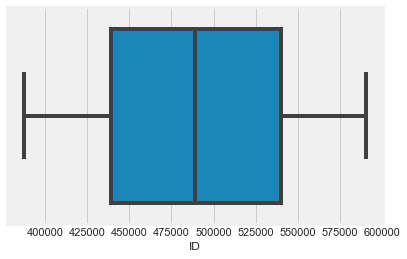

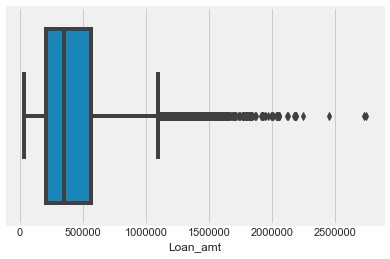

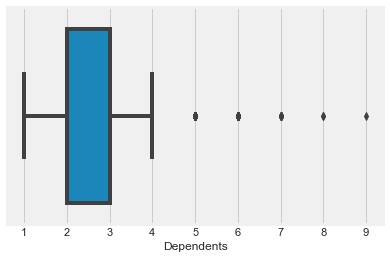

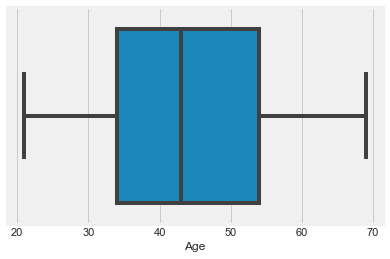

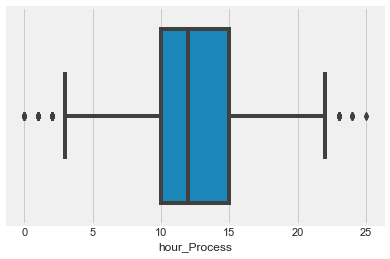

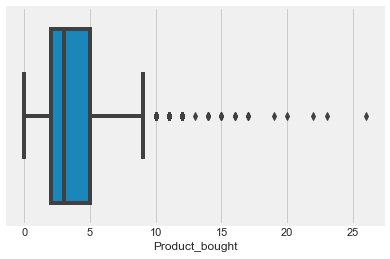

In [128]:
splot_cols=df_test.columns
for i in splot_cols:
    if df_test[i].dtype != 'object' and df_test[i].isnull().values.any() != True:
        sns.boxplot(df_test[i])
        plt.show()

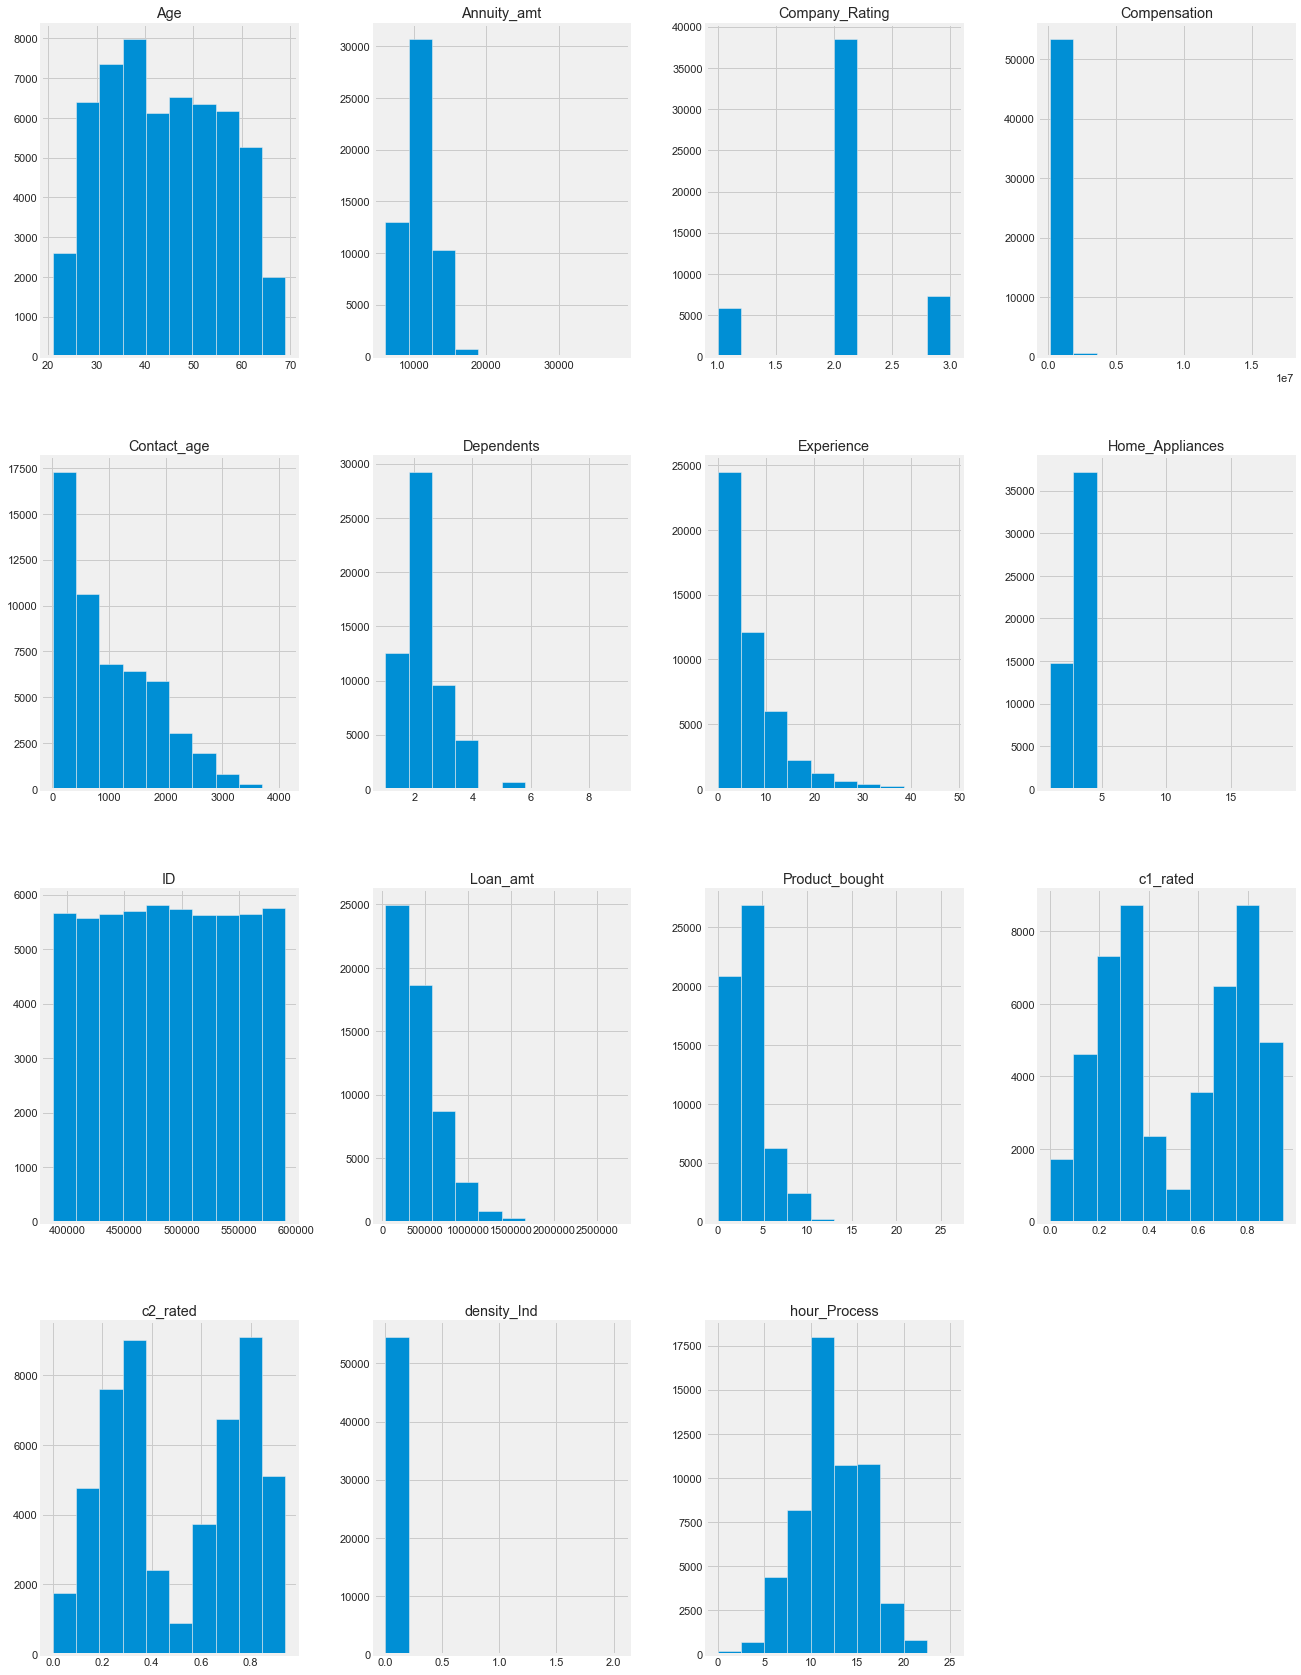

In [129]:
df_test.hist(figsize=(20,30));

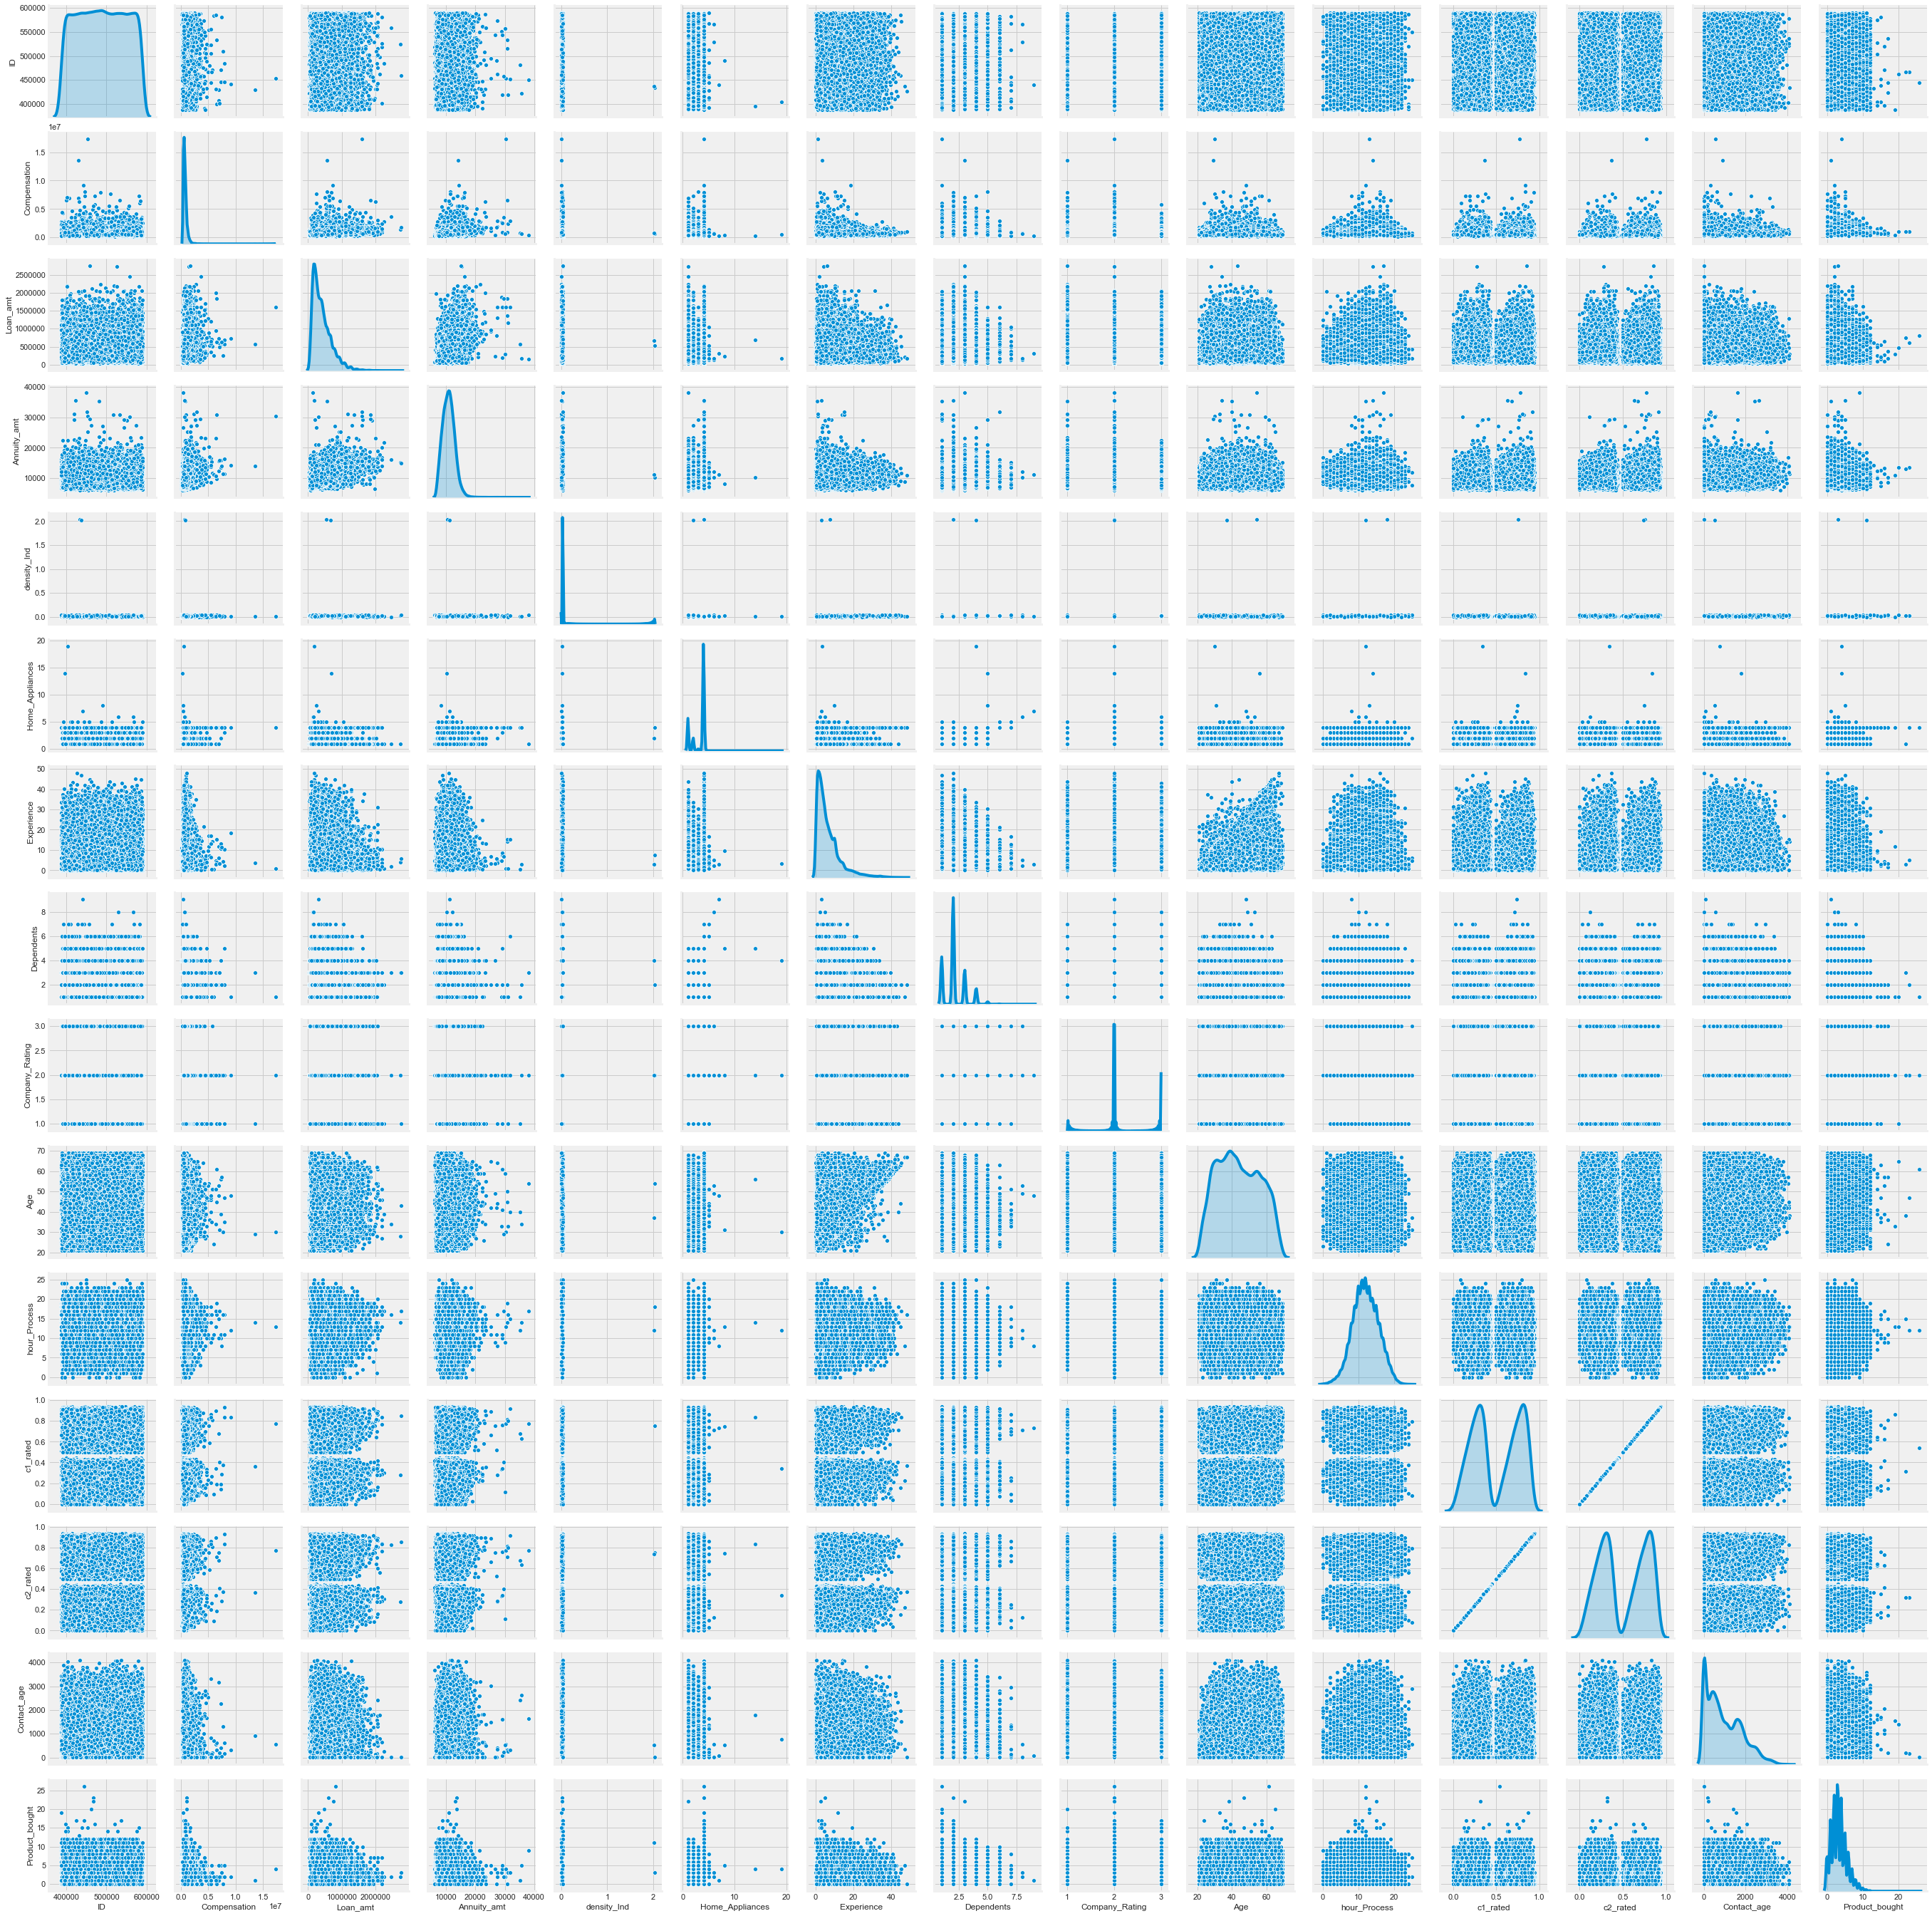

In [130]:
sns.pairplot(df_test,diag_kind='kde',palette="tab10")

In [131]:
df_test.corr()

ID  Compensation  Loan_amt  Annuity_amt  density_Ind  \
ID               1.000000     -0.003569 -0.002687     0.003217    -0.004054   
Compensation    -0.003569      1.000000  0.326755     0.294794     0.002889   
Loan_amt        -0.002687      0.326755  1.000000     0.475121     0.002147   
Annuity_amt      0.003217      0.294794  0.475121     1.000000    -0.001020   
density_Ind     -0.004054      0.002889  0.002147    -0.001020     1.000000   
Home_Appliances  0.004358     -0.030340  0.003122    -0.014860    -0.000055   
Experience       0.003605      0.029597  0.072579     0.031105    -0.000303   
Dependents      -0.004247      0.029042  0.050128     0.047485     0.003828   
Company_Rating   0.007188     -0.209238 -0.100620    -0.090894    -0.011318   
Age              0.002184     -0.055023  0.042926    -0.011180    -0.003511   
hour_Process    -0.013538      0.071969  0.047001     0.033913     0.010755   
c1_rated         0.009398     -0.016095  0.004525     0.000883    -0.000070   
c2_rated         0.008507     -0.018081  0.003973    -0.002292     0.004263   
Contact_age      0.003870      0.035405  0.059379     0.044301    -0.001684   
Product_bought  -0.004107      0.021911 -0.036242    -0.003887     0.013855   

                 Home_Appliances  Experience  Dependents  Company_Rating  \
ID                      0.004358    0.003605   -0.004247        0.007188   
Compensation           -0.030340    0.029597    0.029042       -0.209238   
Loan_amt                0.003122    0.072579    0.050128       -0.100620   
Annuity_amt            -0.014860    0.031105    0.047485       -0.090894   
density_Ind            -0.000055   -0.000303    0.003828       -0.011318   
Home_Appliances         1.000000    0.072378   -0.620284       -0.005180   
Experience              0.072378    1.000000   -0.032660        0.010881   
Dependents             -0.620284   -0.032660    1.000000        0.032991   
Company_Rating         -0.005180    0.010881    0.032991        1.000000   
Age                     0.327386    0.330213   -0.267369       -0.008368   
hour_Process            0.000694   -0.015223   -0.009242       -0.235975   
c1_rated                0.015578    0.034229   -0.007659       -0.008141   
c2_rated                0.015920    0.034297   -0.009590       -0.006611   
Contact_age            -0.010797    0.125883    0.028401       -0.017996   
Product_bought          0.031189    0.003489   -0.017921        0.012092   

                      Age  hour_Process  c1_rated  c2_rated  Contact_age  \
ID               0.002184     -0.013538  0.009398  0.008507     0.003870   
Compensation    -0.055023      0.071969 -0.016095 -0.018081     0.035405   
Loan_amt         0.042926      0.047001  0.004525  0.003973     0.059379   
Annuity_amt     -0.011180      0.033913  0.000883 -0.002292     0.044301   
density_Ind     -0.003511      0.010755 -0.000070  0.004263    -0.001684   
Home_Appliances  0.327386      0.000694  0.015578  0.015920    -0.010797   
Experience       0.330213     -0.015223  0.034229  0.034297     0.125883   
Dependents      -0.267369     -0.009242 -0.007659 -0.009590     0.028401   
Company_Rating  -0.008368     -0.235975 -0.008141 -0.006611    -0.017996   
Age              1.000000     -0.081447  0.057631  0.058189     0.071338   
hour_Process    -0.081447      1.000000 -0.010034 -0.008786     0.004739   
c1_rated         0.057631     -0.010034  1.000000  1.000000     0.016057   
c2_rated         0.058189     -0.008786  1.000000  1.000000     0.015072   
Contact_age      0.071338      0.004739  0.016057  0.015072     1.000000   
Product_bought   0.045922     -0.018766 -0.027110 -0.026379     0.085147   

                 Product_bought  
ID                    -0.004107  
Compensation           0.021911  
Loan_amt              -0.036242  
Annuity_amt           -0.003887  
density_Ind            0.013855  
Home_Appliances        0.031189  
Experience             0.003489  
Dependents            -0.017921  
Company_Rating    

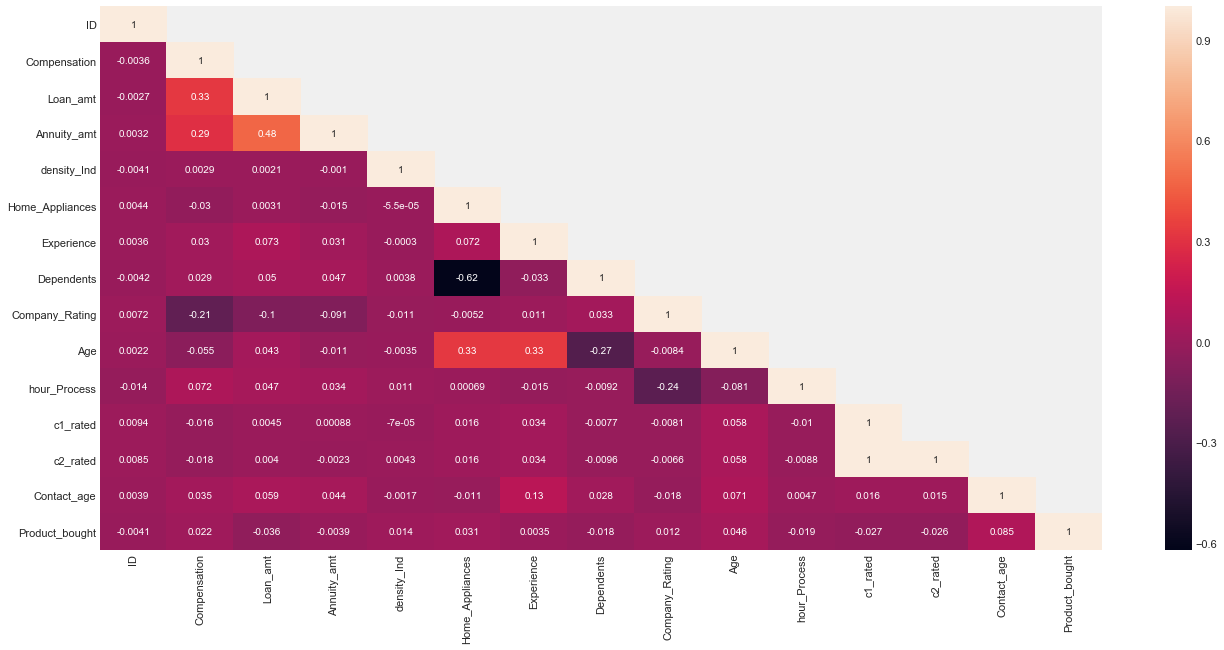

In [132]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_test.corr(), annot=True,mask=np.triu(df_test.corr(),+1))

In [133]:
for column in df_test.columns:
    if df_test[column].dtype != 'object':
        median = df_test[column].median()
        df_test[column] = df_test[column].fillna(median)    
        
df_test.isnull().sum() 

ID                       0
Compensation             0
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt              0
density_Ind              0
Job_Type              4320
Default_hist             0
Prop_List              911
Home_Appliances          0
Region_Type              0
Credit_Inq            1166
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience               0
Income_Alt            3299
Day_Process              0
Ph_No                    0
Type_Loan                0
Dependents               0
Company_Rating           0
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated                 0
c2_rated                 0
Contact_age              0
Product_bought           0
dtype: int64

In [134]:
for column in df_test:
    if df_test[column].dtype == 'object':
        if df_test[column].isnull().any():
#             if(column in cateogry_columns):
                df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
df_test.isnull().sum() 

ID                    0
Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph_No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
dtype: int64

In [135]:
df_cat_test = df_test.select_dtypes(include = ['object'])
df_num_test = df_test.select_dtypes(include = ['float64','int64'])

In [136]:
df_cat_test = pd.get_dummies(df_cat_test, drop_first = True)
df_cat_test.head()

Vehicle_Status_Y  Job_Type_IT  Job_Type_Non-IT  Default_hist_ndf  \
0                 1            0                0                 1   
1                 0            0                0                 1   
2                 0            1                0                 1   
3                 0            1                0                 1   
4                 0            0                1                 1   

   Prop_List_None  Prop_List_One  Region_Type_Rural  Region_Type_other  \
0               0              0                  0                  0   
1               0              1                  0                  0   
2               0              0                  1                  0   
3               0              1                  0                  0   
4               0              1                  0                  0   

   Credit_Inq_2  Credit_Inq_3  Credit_Inq_>4  Education_det_Other  \
0             0             0              0                    0   
1             0             0              0                    0   
2             0             0              0                    0   
3             0             0              0                    0   
4             0             1              0                    0   

   Education_det_P_Grad  Marital_Stat_Married  Marital_Stat_Single  \
0                     0                     1                    0   
1                     0                     1                    0   
2                     0                     1                    0   
3                     0                     1                    0   
4                     1                     1                    0   

   Marital_Stat_Widow  Gen_M  Credit_Lnks_4_to_6  Credit_Lnks_>6  \
0                   0      1                   0               0   
1                   0      1                   0               0   
2                   0      1                   0               0   
3                   0      1                   0               0   
4                   0      0                   0               0   

   Income_Alt_Y  Day_Process_SAT  Day_Process_Sun  Day_Process_Tue  \
0             0                0                0                0   
1             1                0                0                0   
2             1                0                0                0   
3             1                0                0                1   
4             1                0                0                0   

   Day_Process_mon  Day_Process_thur  Day_Process_wed  Ph_No_Yes  \
0                0                 1                0          1   
1                0                 0                1          0   
2                0                 1                0          0   
3                0                 0                0          1   
4                0                 0                1          1   

   Type_Loan_RLoan  Region_East  Region_North  Region_South  \
0                0            0             1             0   
1                0            0             0             0   
2                0            0             0             1   
3                0            1             0             0   
4                1            0             1             0   

   Addr_permanent_Yes  Permanent_Addr_tag_Yes  
0                   1                       1  
1                   1                       1  
2                   1                       1  
3                   1                       1  
4                   1                       1

In [137]:
# df_train_copy1 = pd.concat([df_cat_train,df_num_train],axis=1)
df_test_copy2 = pd.concat([df_cat_test,df_num_test],axis=1)
df_test_copy2.head()

Vehicle_Status_Y  Job_Type_IT  Job_Type_Non-IT  Default_hist_ndf  \
0                 1            0                0                 1   
1                 0            0                0                 1   
2                 0            1                0                 1   
3                 0            1                0                 1   
4                 0            0                1                 1   

   Prop_List_None  Prop_List_One  Region_Type_Rural  Region_Type_other  \
0               0              0                  0                  0   
1               0              1                  0                  0   
2               0              0                  1                  0   
3               0              1                  0                  0   
4               0              1                  0                  0   

   Credit_Inq_2  Credit_Inq_3  Credit_Inq_>4  Education_det_Other  \
0             0             0              0                    0   
1             0             0              0                    0   
2             0             0              0                    0   
3             0             0              0                    0   
4             0             1              0                    0   

   Education_det_P_Grad  Marital_Stat_Married  Marital_Stat_Single  \
0                     0                     1                    0   
1                     0                     1                    0   
2                     0                     1                    0   
3                     0                     1                    0   
4                     1                     1                    0   

   Marital_Stat_Widow  Gen_M  Credit_Lnks_4_to_6  Credit_Lnks_>6  \
0                   0      1                   0               0   
1                   0      1                   0               0   
2                   0      1                   0               0   
3                   0      1                   0               0   
4                   0      0                   0               0   

   Income_Alt_Y  Day_Process_SAT  Day_Process_Sun  Day_Process_Tue  \
0             0                0                0                0   
1             1                0                0                0   
2             1                0                0                0   
3             1                0                0                1   
4             1                0                0                0   

   Day_Process_mon  Day_Process_thur  Day_Process_wed  Ph_No_Yes  \
0                0                 1                0          1   
1                0                 0                1          0   
2                0                 1                0          0   
3                0                 0                0          1   
4                0                 0                1          1   

   Type_Loan_RLoan  Region_East  Region_North  Region_South  \
0                0            0             1             0   
1                0            0             0             0   
2                0            0             0             1   
3                0            1             0             0   
4                1            0             1             0   

   Addr_permanent_Yes  Permanent_Addr_tag_Yes      ID  Compensation  \
0                   1                       1  487410      653106.0   
1                   1                       1  533258      434150.0   
2                   1                       1  581926      489060.0   
3                   1                       1  486301      957294.0   
4                   1                       1  580822     1333739.0   

    Loan_amt  Annuity_amt  density_Ind  Home_Appliances  Experience  \
0  809400.00      9145.51       0.0015              1.0         5.4   
1   72618.75      7683.23       0.0332              4.0         2.3   
2  267255.80      9032.85       0.031

In [138]:
# df_train_copy1 = df_train_copy1.drop(columns=['ID'], axis=1)
test_file_ids = df_test_copy2['ID']
df_test_copy2 = df_test_copy2.drop(columns=['ID'], axis=1)
df_test_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 47 columns):
Vehicle_Status_Y          56760 non-null uint8
Job_Type_IT               56760 non-null uint8
Job_Type_Non-IT           56760 non-null uint8
Default_hist_ndf          56760 non-null uint8
Prop_List_None            56760 non-null uint8
Prop_List_One             56760 non-null uint8
Region_Type_Rural         56760 non-null uint8
Region_Type_other         56760 non-null uint8
Credit_Inq_2              56760 non-null uint8
Credit_Inq_3              56760 non-null uint8
Credit_Inq_>4             56760 non-null uint8
Education_det_Other       56760 non-null uint8
Education_det_P_Grad      56760 non-null uint8
Marital_Stat_Married      56760 non-null uint8
Marital_Stat_Single       56760 non-null uint8
Marital_Stat_Widow        56760 non-null uint8
Gen_M                     56760 non-null uint8
Credit_Lnks_4_to_6        56760 non-null uint8
Credit_Lnks_>6            56760 non-null uint

In [139]:
df_test_copy2 = df_test_copy2.drop(['Experience','c1_rated','c2_rated'],axis=1)

In [140]:
final_predictions = rfcl.predict(df_test_copy2)
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission.rename(columns={"Unnamed 0": "Default"},inplace=True)
submission.to_csv('submission.csv',index = False)